# Задание

Анализ фотоархива

Вам предлагается проанализировать фрагмент домашнего фотоархива, объемом около 200-500 фотографий, и построить по нему инфографику / сделать какие-то выводы. Если вы по каким-то причинам не хотите использовать свой домашний фотоархив, то можно взять открытый набор фотографий из интернета.

Для извлечения структурированных данных из фотографий используйте нейросетевые инструменты (YOLO, deepface). Определите сами, какие данные будут полезны для вашего исследования.

В качестве результата работы вам необходимо представить:
1. код вашего исследования,
2. краткое описание идеи исследования,
3. ссылку/скриншот собранного фотоархива,
4. результирующие графики, не менее 3 шт., по разным утверждениям.

Пример: если у вас есть фотоальбом с корпоратива, то графики после анализа могут быть следующими:
1. Где чаще делались фото: на улице или в помещении?
2. Соотношение мужчин и женщин
3. Кто на фото счастливее, мужчины или женщины?
4. Статистика всех распознанных эмоций (общий эмоциональный фон мероприятия)
5. Распределение возрастов среди присутствующих
6. Этническая принадлежность людей
7. Сколько людей на фото держат бокалы/микрофоны/прочее
8. Есть ли разница в эмоциях между молодыми сотрудниками и более взрослыми коллегами?
9. Подсчёт максимального/среднего количества людей на одном снимке
10. Какие предметы чаще всего встречались в кадре, помимо людей?

И так далее. Вы создаёте как минимум 3 графика, которые наглядно демонстрируют анализ различных утверждений на основе одной фотобазы.


Идеи для анализа:

— Посмотреть, какие люди чаще всего встречаются на фотографиях (напр. пол, возраст, национальность, эмоции и пр.)
— Исследовать, зависит ли счастье людей на фото от присутствия котиков (напр. кол-во грустных людей без котиков, какой пол больше радуется котикам, какое макс. кол-во котиков может быть на 1 снимке и пр.)
— Посмотреть, фотографируетесь ли вы чаще на улице или в помещении (напр. график indoor outdoor; какие предметы вас чаще окружают, если фото сделано дома и если оно на улице; какие у вас эмоции в зависимости от местонахождения и пр.)

Вам нужно сдать:
1. ссылку на код вашего исследования
2. ссылку/скриншот собранного фотоархива
3. краткое описание идеи исследования
4. результирующие графики, не менее 3 шт., по разным утверждениям

# Идея исследования

Основная идея заключается в анализе картин из Русской Классической живописи по наличию и особенностям изображения людей (пол, возраст, эмоции), а также объектов на картинах, чтобы выявить статистические закономерности и стилистические предпочтения разных художников.


# Данные

Этот набор данных содержит более 1600 картин из Русского музея, Третьяковской галереи и других государственных архивов. Каждая картина имеет соответствующее описание, сгенерированное GPT2, которое можно найти в файле description.csv.


[Карточка с данными](https://www.kaggle.com/datasets/downshift/russian-classic-painting-dataset)

#### Скачивание данных

In [4]:
# Скачаем датасет с Русской живописью
!curl -L -o ./russian-classic-painting-dataset.zip \
  https://www.kaggle.com/api/v1/datasets/download/downshift/russian-classic-painting-dataset


# Разархивируем данные
!unzip -q russian-classic-painting-dataset -d dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  174M  100  174M    0     0  79.2M      0  0:00:02  0:00:02 --:--:-- 99.2M


#### Must-have Импорты

In [5]:
# Чтобы игнорировать мусорный вывод
import warnings

# Для работы с графиками
import matplotlib.pyplot as plt
import seaborn as sns

# Для работы с линейной алгеброй
import numpy as np

# Настройка стиля
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Игнорируем Warning'и для более красивого вывода
warnings.filterwarnings('ignore')

### Первичный Анализ данных

In [6]:
import pandas as pd

# Преобразуем таблицу с описанием данных в Pandas Dataframe
dataset_path = './dataset'
dataset = pd.read_csv(f'{dataset_path}/description.csv')

# Посмотрим на 3 верхних строки из датасета с описанием
dataset.head(3)

,filename,ru_title,ru_author,gpt_description,eng_title,eng_author
0,./data/845010375.jpg,Золотая осень,Исаак Ильич Левитан,a painting of a river in the fall,Golden Autumn,Isaac Ilyich Levittan
1,./data/669860839.jpg,Поздняя осень,Исаак Ильич Левитан,a painting of a field with a barn in the backg...,Late autumn,Isaac Ilyich Levittan
2,./data/741052246.jpg,Зимой в лесу. 1885,Исаак Ильич Левитан,a painting of a deer in the snow,In winter in the woods. 1885,Isaac Ilyich Levittan


Теперь посмотрим, сколько уникальных авторов встречается в датасете

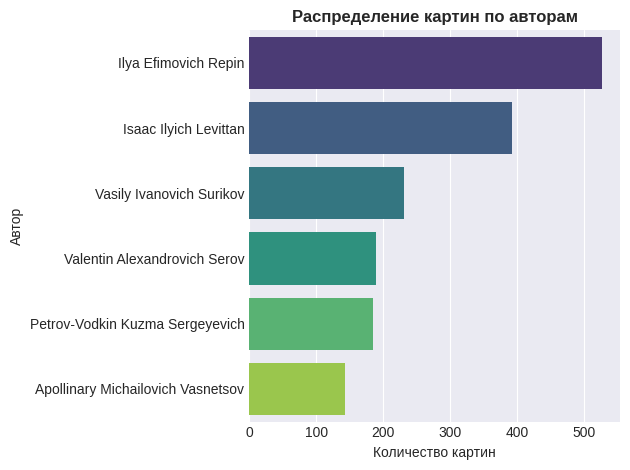

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Получаем количество картин по авторам
def show_authors_plot(df):
    author_counts = df['eng_author'].value_counts()

    # Создаем горизонтальную столбчатую диаграмму
    sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis')

    plt.xlabel('Количество картин')
    plt.ylabel('Автор')
    plt.title('Распределение картин по авторам', fontweight='bold')
    plt.tight_layout()
    plt.show()

show_authors_plot(dataset)

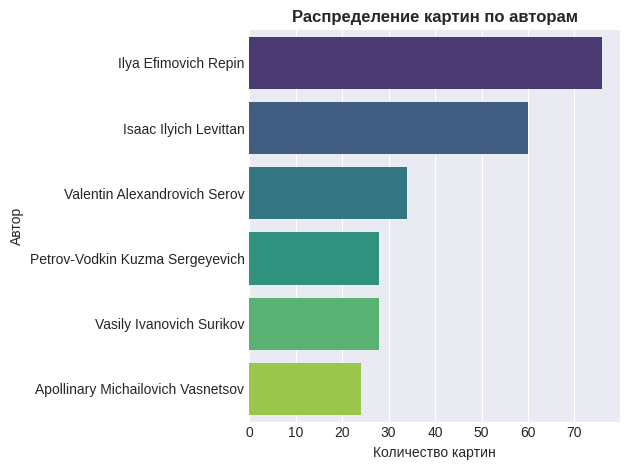

In [8]:
# Получаем 500 картин, чтобы уменьшить датасет
dataset = dataset.sample(250, random_state=42)

show_authors_plot(dataset)

## Анализ датасета с помощью Компьютерного Зрения

## Анализ людей на картинах (пол, возраст, эмоции)

Начнем с поиска людей на картинках. Для этого загрузим из Huggingface модель YOLOv8, чтобы она детектировала людей на картинах

In [9]:
# Загрузка пакета ultralitics
!pip install -q ultralytics==8.3.206

# Загрузка пакета hf-cli для скачивания весов модели из HuggingFace
!pip install -U -q "huggingface_hub[cli]"

# Загрузка пакета для динамической полоски итерирования
!pip install -q tqdm

# Скачивание YOLOv8
!hf download Ultralytics/YOLOv8 yolov8l.pt --local-dir /content/model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.5 MB/s eta 0:00:00
yolov8l.pt: 100% 87.8M/87.8M [00:01<00:00, 58.7MB/s]
Download complete. Moving file to /content/model/yolov8l.pt
/content/model/yolov8l.pt


In [10]:
import os
import random
from ultralytics import YOLO
from PIL import Image
from pathlib import Path
from dataclasses import dataclass


@dataclass
class PredictionInfo:
    """Структура для хранения информации о предсказании"""
    class_id: int
    count: int



class YoloDetector:
    model_ckp_path = '/content/model/yolov8l.pt'
    model = YOLO(model_ckp_path)

    def predict(
        self,
        image_path: str,
        do_display: bool = False,
        save_crops: bool = True,
        output_dir: str = 'predictions'
    ) -> dict[str, PredictionInfo]:
        """
        Предсказывает объекты на изображении с помощью YOLO

        Args:
            image_path: Путь к изображению
            do_display: Отображать ли результат
            save_crops: Сохранять ли вырезанные bounding box'ы
            output_dir: Директория для сохранения результатов

        Returns:
            Словарь с информацией о предсказанных классах
        """
        # Загружаем картинку как Image объект
        image = Image.open(Path(dataset_path, image_path))

        # Предсказываем результат с YOLO
        results = self.model(image, verbose=False)
        predicted_classes = {}

        # Создаем директорию для сохранения, если нужно
        if save_crops:
            output_path = Path(output_dir)
            output_path.mkdir(parents=True, exist_ok=True)

        # Получаем имя файла без расширения для именования
        image_stem = Path(image_path).stem

        # Отображение результатов
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1])  # RGB Картинка

            if do_display:
                display(im)

            boxes = r.boxes

            # Счетчик для каждого класса (для уникальных имен файлов)
            class_counters = {}

            # Итерируемся по каждому предсказанию в картинке
            for box in boxes:
                # Получаем ID найденного в картинке класса
                class_id = int(box.cls)

                # Получаем название класса
                class_name = self.model.names[class_id]

                # Получаем координаты bounding box'а (x1, y1, x2, y2)
                xyxy = box.xyxy[0].cpu().numpy()
                x1, y1, x2, y2 = map(int, xyxy)

                # Получаем confidence score
                confidence = float(box.conf)

                # Сохраняем вырезанный bounding box
                if save_crops:
                    # Вырезаем область из исходного изображения
                    cropped = image.crop((x1, y1, x2, y2))

                    # Счетчик для уникального имени
                    if class_name not in class_counters:
                        class_counters[class_name] = 0
                    class_counters[class_name] += 1

                    # Создаем подпапку для каждого класса
                    class_dir = output_path / class_name
                    class_dir.mkdir(parents=True, exist_ok=True)

                    # Формируем имя файла с информацией
                    crop_filename = f"{image_stem}_{class_name}_{class_counters[class_name]}_conf{confidence:.2f}.jpg"
                    crop_path = class_dir / crop_filename

                    # Сохраняем вырезанную область
                    cropped.save(crop_path)

                # Добавляем в словарь результатов найденный bounded box
                if class_name not in predicted_classes:
                    # Если еще не встречали класс, то добавляем
                    predicted_classes[class_name] = PredictionInfo(
                        class_id=class_id,
                        count=1
                    )
                else:
                    # Если уже нашли, то добавляем в счетчик
                    predicted_classes[class_name].count += 1

        return predicted_classes


yolo_detector = YoloDetector()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


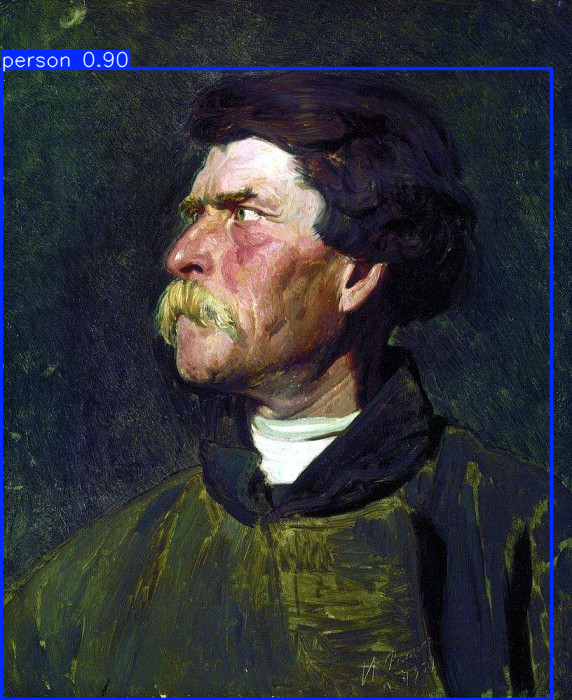

{'person': PredictionInfo(class_id=0, count=1)}

In [11]:
# Берем рандомную картинку
random_image_path = dataset.sample(1, random_state=4)['filename'].values[0]

yolo_detector.predict(random_image_path, do_display=True, save_crops=False)

Теперь проанализируем картины на наличие людей в них.

In [12]:
from tqdm.auto import tqdm
import pandas as pd

# Добавляем колонки
class_names = list(yolo_detector.model.names.values())
dataset[class_names] = 0

# Собираем все изменения в словарь
updates = {class_name: [] for class_name in class_names}

for idx in tqdm(dataset.index, desc="🔍 YOLO анализ"):
    image_path = dataset.loc[idx, 'filename']

    try:
        preds = yolo_detector.predict(
            image_path=image_path,
            do_display=False,
            save_crops=True
        )

        # Собираем значения для этой строки
        row_values = {class_name: 0 for class_name in class_names}
        for class_name, pred_info in preds.items():
            row_values[class_name] = pred_info.count

        # Добавляем в списки
        for class_name in class_names:
            updates[class_name].append(row_values[class_name])

    except Exception as e:
        print(f"❌ Ошибка: {image_path}")
        # Добавляем нули при ошибке
        for class_name in class_names:
            updates[class_name].append(0)

# Применяем все изменения одним махом (БЫСТРО!)
for class_name, values in updates.items():
    dataset[class_name] = values

dataset['is_person_on_image'] = dataset['person'] > 0
dataset[class_names] = dataset[class_names].astype(int)

dataset.head(3)

🔍 YOLO анализ:   0%|          | 0/250 [00:00<?, ?it/s]

,filename,ru_title,ru_author,gpt_description,eng_title,eng_author,person,bicycle,car,motorcycle,...,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush,is_person_on_image
941,./data/928698730.jpg,Старое устье реки Неглинной. 1924,Аполлинарий Михайлович Васнецов,a painting of a city with a lot of snow,Old mouth of the river Neglin. 1924.,Apollinary Michailovich Vasnetsov,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
988,./data/499627685.jpg,Северный пейзаж. 1902,Аполлинарий Михайлович Васнецов,a painting of a green field with trees and a r...,North scenery. 1902,Apollinary Michailovich Vasnetsov,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
405,./data/509927368.jpg,Николай Мирликийский избавляет от смерти трёх ...,Илья Ефимович Репин,a painting of a man being a sword to another man,Nikolai Mirlika saves the death of three innoc...,Ilya Efimovich Repin,12,0,0,0,...,0,0,0,0,0,0,0,0,0,True


### Верхнеуровневый анализ композиций Русской живописи

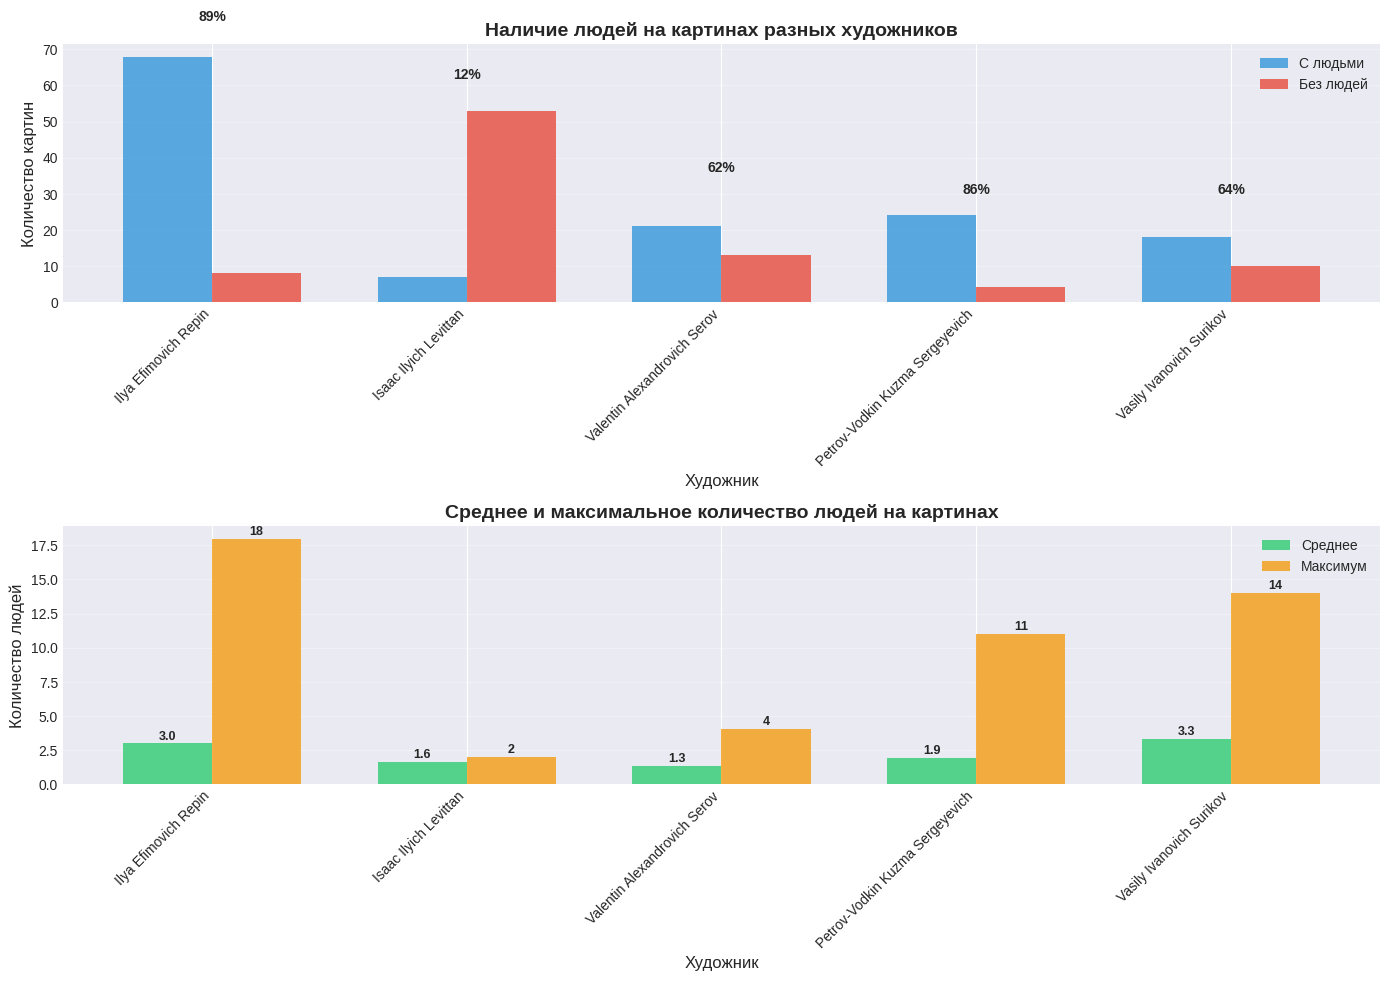

In [13]:
def plot_1_people_distribution(dataset):
    """
    График 1: Распределение количества людей на картинах по авторам
    Вопрос: Как разные художники изображали людей на своих картинах?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Подграфик 1: Доля картин с людьми по авторам
    author_stats = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = (author_data['person'] > 0).sum()
        total = len(author_data)
        percentage = (with_people / total * 100) if total > 0 else 0
        author_stats.append({
            'author': author,
            'with_people': with_people,
            'without_people': total - with_people,
            'percentage': percentage
        })

    author_df = pd.DataFrame(author_stats)

    x = np.arange(len(author_df))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, author_df['with_people'], width,
                        label='С людьми', color='#3498db', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, author_df['without_people'], width,
                        label='Без людей', color='#e74c3c', alpha=0.8)

    axes[0].set_xlabel('Художник', fontsize=12)
    axes[0].set_ylabel('Количество картин', fontsize=12)
    axes[0].set_title('Наличие людей на картинах разных художников',
                     fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(author_df['author'], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Добавляем проценты
    for i, pct in enumerate(author_df['percentage']):
        axes[0].text(i, author_df.iloc[i]['with_people'] + author_df.iloc[i]['without_people'] + 2,
                    f'{pct:.0f}%', ha='center', fontsize=10, fontweight='bold')

    # Подграфик 2: Среднее количество людей на картинах (где они есть)
    avg_people_by_author = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = author_data[author_data['person'] > 0]
        if len(with_people) > 0:
            avg = with_people['person'].mean()
            max_people = with_people['person'].max()
        else:
            avg = 0
            max_people = 0
        avg_people_by_author.append({
            'author': author,
            'avg': avg,
            'max': max_people
        })

    avg_df = pd.DataFrame(avg_people_by_author)

    x = np.arange(len(avg_df))
    width = 0.35

    bars1 = axes[1].bar(x - width/2, avg_df['avg'], width,
                        label='Среднее', color='#2ecc71', alpha=0.8)
    bars2 = axes[1].bar(x + width/2, avg_df['max'], width,
                        label='Максимум', color='#f39c12', alpha=0.8)

    axes[1].set_xlabel('Художник', fontsize=12)
    axes[1].set_ylabel('Количество людей', fontsize=12)
    axes[1].set_title('Среднее и максимальное количество людей на картинах',
                     fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(avg_df['author'], rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

    # Добавляем значения
    for i, (avg, max_val) in enumerate(zip(avg_df['avg'], avg_df['max'])):
        axes[1].text(i - width/2, avg + 0.1, f'{avg:.1f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        axes[1].text(i + width/2, max_val + 0.1, f'{int(max_val)}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.savefig('plot1_people_distribution_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_1_people_distribution(dataset)

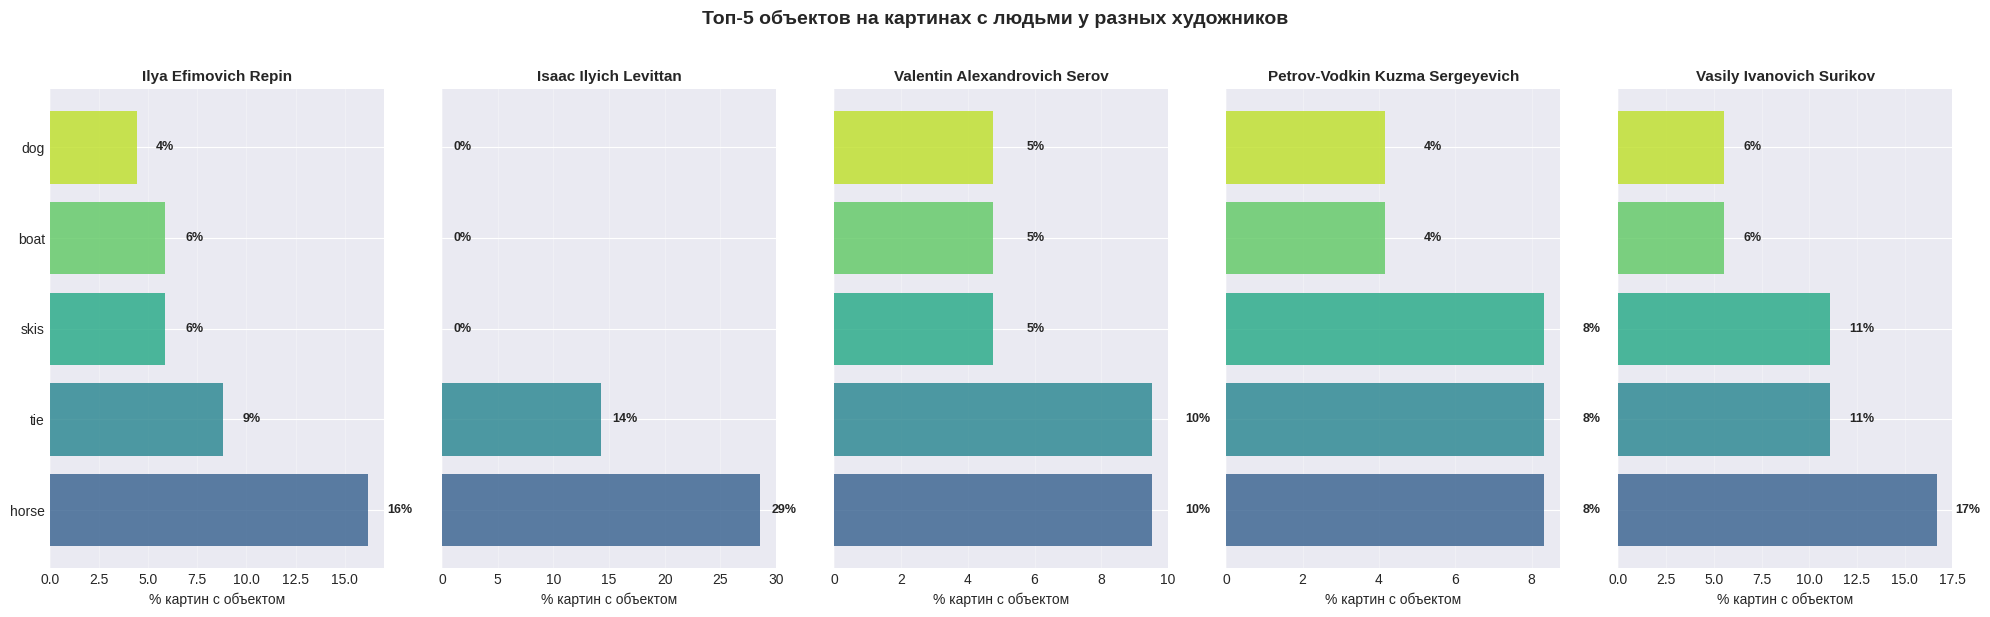

In [14]:
def plot_2_objects_with_people(dataset):
    """
    График 2: Какие объекты окружают людей у разных художников?
    Вопрос: Отличаются ли предпочтения художников в изображении объектов?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()

    # Интересующие нас объекты
    object_columns = [item for item in list(yolo_detector.model.names.values()) if item != 'person']

    # Собираем данные по авторам
    author_object_data = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = author_data[author_data['person'] > 0]

        if len(with_people) > 0:
            for obj in object_columns:
                if obj in dataset.columns:
                    count = (with_people[obj] > 0).sum()
                    percentage = (count / len(with_people) * 100)
                    author_object_data.append({
                        'author': author,
                        'object': obj,
                        'count': count,
                        'percentage': percentage
                    })

    df = pd.DataFrame(author_object_data)

    # График: топ-5 объектов для каждого автора
    fig, axes = plt.subplots(1, len(top_authors), figsize=(20, 6), sharey=True)

    if len(top_authors) == 1:
        axes = [axes]

    for idx, author in enumerate(top_authors):
        author_df = df[df['author'] == author].nlargest(5, 'percentage')

        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(author_df)))
        axes[idx].barh(range(len(author_df)), author_df['percentage'],
                      color=colors, alpha=0.8)
        axes[idx].set_yticks(range(len(author_df)))
        axes[idx].set_yticklabels(author_df['object'], fontsize=10)
        axes[idx].set_xlabel('% картин с объектом', fontsize=10)

        # Короткое имя автора
        short_name = author
        axes[idx].set_title(f'{short_name}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

        # Добавляем значения
        for i, (pct, cnt) in enumerate(zip(author_df['percentage'], author_df['count'])):
            axes[idx].text(pct + 1, i, f'{pct:.0f}%',
                          va='center', fontsize=9, fontweight='bold')

    fig.suptitle('Топ-5 объектов на картинах с людьми у разных художников',
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('plot2_objects_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_2_objects_with_people(dataset)

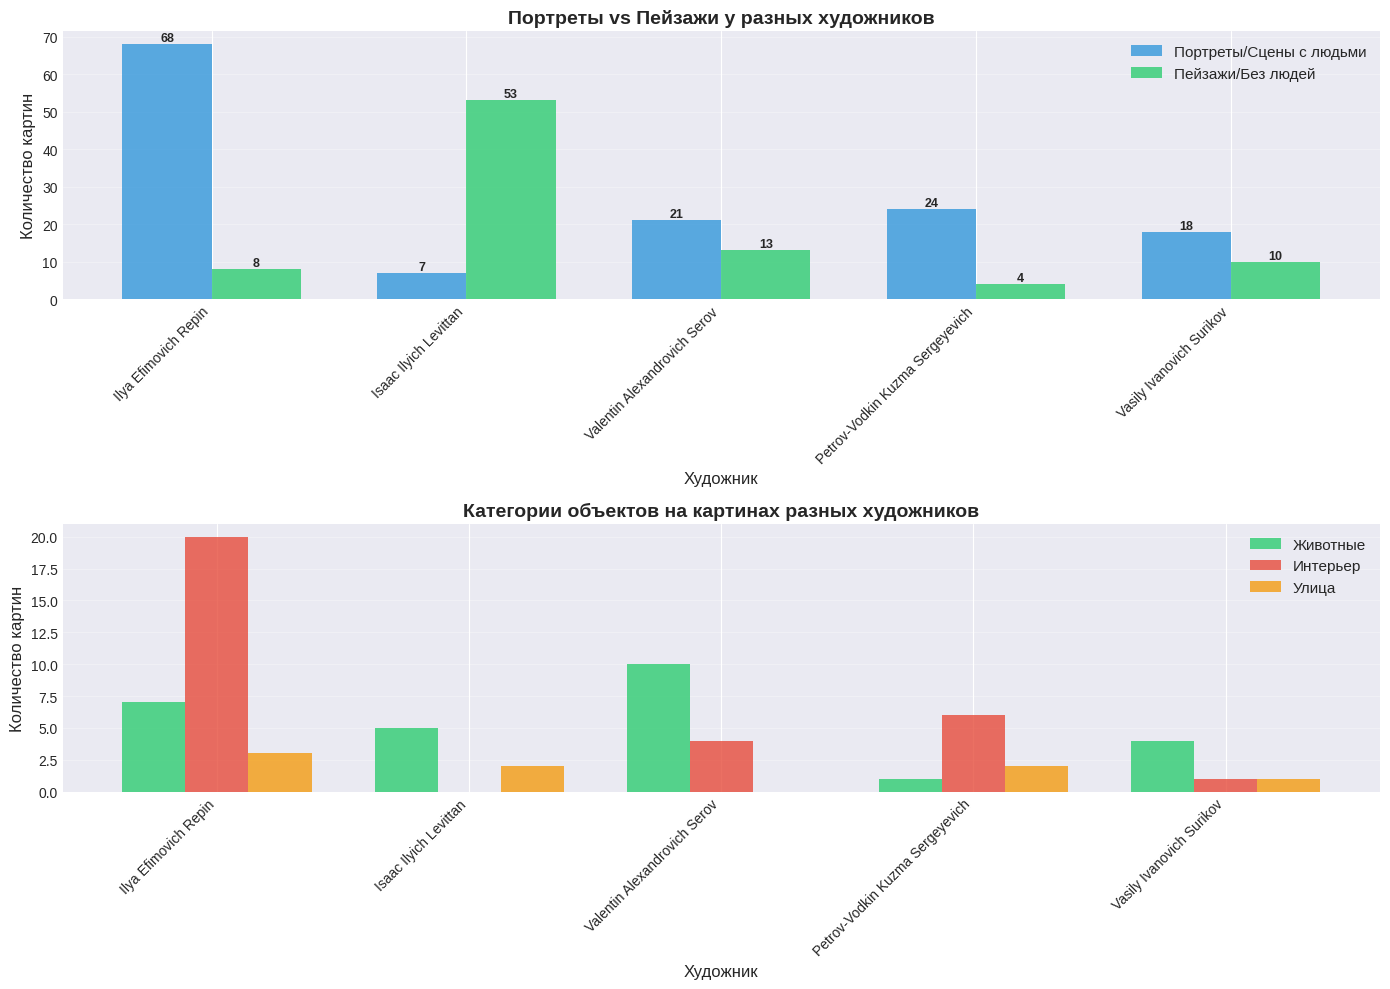

In [15]:
def plot_3_people_vs_no_people(dataset):
    """
    График 3: Сравнение стиля разных художников - портреты vs пейзажи
    Вопрос: Кто из художников предпочитал портреты, а кто пейзажи?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()

    # Категории объектов
    nature_objects = ['bird', 'dog', 'horse', 'cat', 'cow', 'sheep', 'bear']
    indoor_objects = ['chair', 'couch', 'bed', 'dining table', 'book']
    outdoor_objects = ['boat', 'car', 'bicycle', 'bench']

    # Функция для подсчета категории
    def count_category(df, columns):
        total = 0
        for col in columns:
            if col in df.columns:
                total += (df[col] > 0).sum()
        return total

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Подграфик 1: Портреты vs Пейзажи по авторам
    portrait_landscape_data = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        portraits = (author_data['person'] > 0).sum()
        landscapes = (author_data['person'] == 0).sum()
        portrait_landscape_data.append({
            'author': author,
            'portraits': portraits,
            'landscapes': landscapes
        })

    pl_df = pd.DataFrame(portrait_landscape_data)

    x = np.arange(len(pl_df))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, pl_df['portraits'], width,
                        label='Портреты/Сцены с людьми', color='#3498db', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, pl_df['landscapes'], width,
                        label='Пейзажи/Без людей', color='#2ecc71', alpha=0.8)

    axes[0].set_xlabel('Художник', fontsize=12)
    axes[0].set_ylabel('Количество картин', fontsize=12)
    axes[0].set_title('Портреты vs Пейзажи у разных художников',
                     fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(pl_df['author'], rotation=45, ha='right')
    axes[0].legend(fontsize=11)
    axes[0].grid(axis='y', alpha=0.3)

    # Добавляем значения
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                axes[0].text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Подграфик 2: Категории объектов по авторам
    categories = ['Животные', 'Интерьер', 'Улица']
    author_category_data = []

    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        author_category_data.append({
            'author': author,
            'nature': count_category(author_data, nature_objects),
            'indoor': count_category(author_data, indoor_objects),
            'outdoor': count_category(author_data, outdoor_objects)
        })

    cat_df = pd.DataFrame(author_category_data)

    x = np.arange(len(cat_df))
    width = 0.25

    bars1 = axes[1].bar(x - width, cat_df['nature'], width,
                        label='Животные', color='#2ecc71', alpha=0.8)
    bars2 = axes[1].bar(x, cat_df['indoor'], width,
                        label='Интерьер', color='#e74c3c', alpha=0.8)
    bars3 = axes[1].bar(x + width, cat_df['outdoor'], width,
                        label='Улица', color='#f39c12', alpha=0.8)

    axes[1].set_xlabel('Художник', fontsize=12)
    axes[1].set_ylabel('Количество картин', fontsize=12)
    axes[1].set_title('Категории объектов на картинах разных художников',
                     fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(cat_df['author'], rotation=45, ha='right')
    axes[1].legend(fontsize=11)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('plot3_style_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_3_people_vs_no_people(dataset)

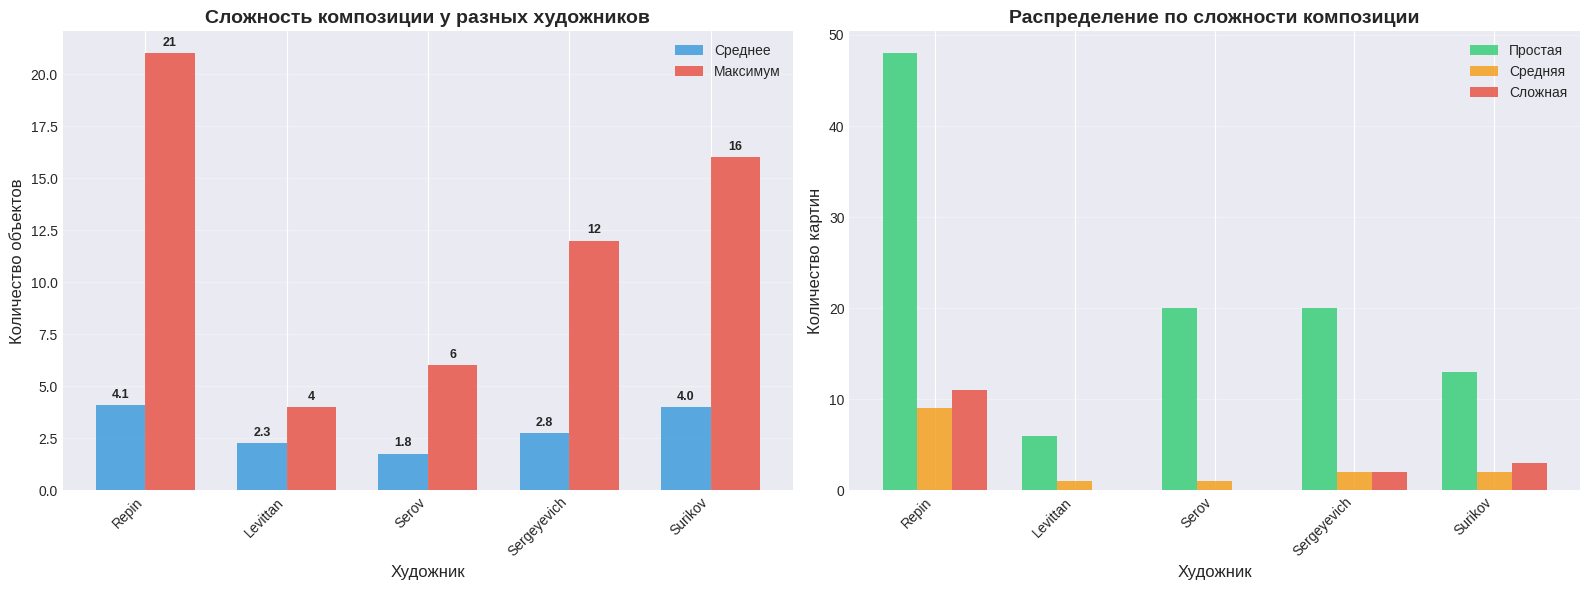

In [16]:
def plot_4_complexity_analysis(dataset):
    """
    График 4: Сложность композиции у разных художников
    Вопрос: Кто создавал более сложные многофигурные композиции?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()

    # Считаем общее количество объектов на каждой картине
    object_columns = [col for col in dataset.columns
                     if col not in ['filename', 'ru_title', 'ru_author',
                                   'gpt_description', 'eng_title', 'eng_author',
                                   'is_person_on_image', 'total_objects']]

    if 'total_objects' not in dataset.columns:
        dataset['total_objects'] = dataset[object_columns].sum(axis=1)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Подграфик 1: Среднее количество объектов у каждого автора
    author_complexity = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = author_data[author_data['person'] > 0]

        if len(with_people) > 0:
            avg_objects = with_people['total_objects'].mean()
            max_objects = with_people['total_objects'].max()
        else:
            avg_objects = 0
            max_objects = 0

        author_complexity.append({
            'author': author,
            'avg': avg_objects,
            'max': max_objects
        })

    comp_df = pd.DataFrame(author_complexity)

    x = np.arange(len(comp_df))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, comp_df['avg'], width,
                        label='Среднее', color='#3498db', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, comp_df['max'], width,
                        label='Максимум', color='#e74c3c', alpha=0.8)

    axes[0].set_xlabel('Художник', fontsize=12)
    axes[0].set_ylabel('Количество объектов', fontsize=12)
    axes[0].set_title('Сложность композиции у разных художников',
                     fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels([a.split()[-1] if len(a.split()) > 2 else a
                             for a in comp_df['author']], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Добавляем значения
    for i, (avg, max_val) in enumerate(zip(comp_df['avg'], comp_df['max'])):
        axes[0].text(i - width/2, avg + 0.2, f'{avg:.1f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        axes[0].text(i + width/2, max_val + 0.2, f'{int(max_val)}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Подграфик 2: Категории сложности по авторам
    complexity_categories = ['Простая\n(1-3 объекта)', 'Средняя\n(4-7 объектов)',
                            'Сложная\n(8+ объектов)']

    author_cat_data = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = author_data[author_data['person'] > 0]

        simple = (with_people['total_objects'] <= 3).sum()
        medium = ((with_people['total_objects'] > 3) & (with_people['total_objects'] <= 7)).sum()
        complex_count = (with_people['total_objects'] > 7).sum()

        author_cat_data.append({
            'author': author,
            'simple': simple,
            'medium': medium,
            'complex': complex_count
        })

    cat_df = pd.DataFrame(author_cat_data)

    x = np.arange(len(cat_df))
    width = 0.25

    bars1 = axes[1].bar(x - width, cat_df['simple'], width,
                        label='Простая', color='#2ecc71', alpha=0.8)
    bars2 = axes[1].bar(x, cat_df['medium'], width,
                        label='Средняя', color='#f39c12', alpha=0.8)
    bars3 = axes[1].bar(x + width, cat_df['complex'], width,
                        label='Сложная', color='#e74c3c', alpha=0.8)

    axes[1].set_xlabel('Художник', fontsize=12)
    axes[1].set_ylabel('Количество картин', fontsize=12)
    axes[1].set_title('Распределение по сложности композиции',
                     fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels([a.split()[-1] if len(a.split()) > 2 else a
                             for a in cat_df['author']], rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('plot4_complexity_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_4_complexity_analysis(dataset)

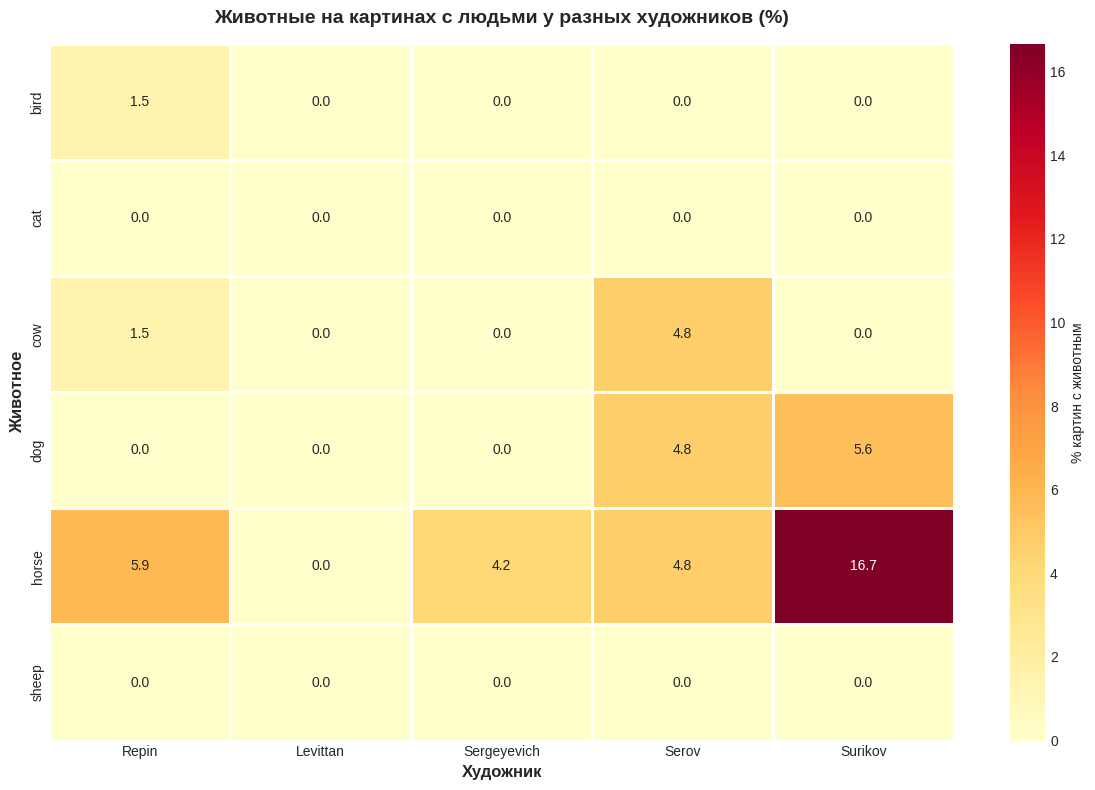

In [17]:
def plot_5_animals_with_people(dataset):
    """
    График 5: Предпочтения художников в изображении животных
    Вопрос: Какие животные встречаются на картинах разных художников?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()
    animals = ['horse', 'dog', 'bird', 'cat', 'cow', 'sheep']

    # Собираем данные по авторам и животным
    author_animal_data = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        with_people = author_data[author_data['person'] > 0]

        for animal in animals:
            if animal in dataset.columns:
                count = (with_people[animal] > 0).sum()
                percentage = (count / len(with_people) * 100) if len(with_people) > 0 else 0
                author_animal_data.append({
                    'author': author,
                    'animal': animal,
                    'count': count,
                    'percentage': percentage
                })

    df = pd.DataFrame(author_animal_data)

    # График: тепловая карта
    fig, ax = plt.subplots(figsize=(12, 8))

    # Создаем матрицу для heatmap
    pivot_table = df.pivot(index='animal', columns='author', values='percentage')

    # Сокращаем имена авторов
    pivot_table.columns = [a.split()[-1] if len(a.split()) > 2 else a
                           for a in pivot_table.columns]

    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd',
                cbar_kws={'label': '% картин с животным'},
                linewidths=1, linecolor='white',
                ax=ax)

    ax.set_xlabel('Художник', fontsize=12, fontweight='bold')
    ax.set_ylabel('Животное', fontsize=12, fontweight='bold')
    ax.set_title('Животные на картинах с людьми у разных художников (%)',
                fontsize=14, fontweight='bold', pad=15)

    plt.tight_layout()
    plt.savefig('plot5_animals_by_author.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_5_animals_with_people(dataset)

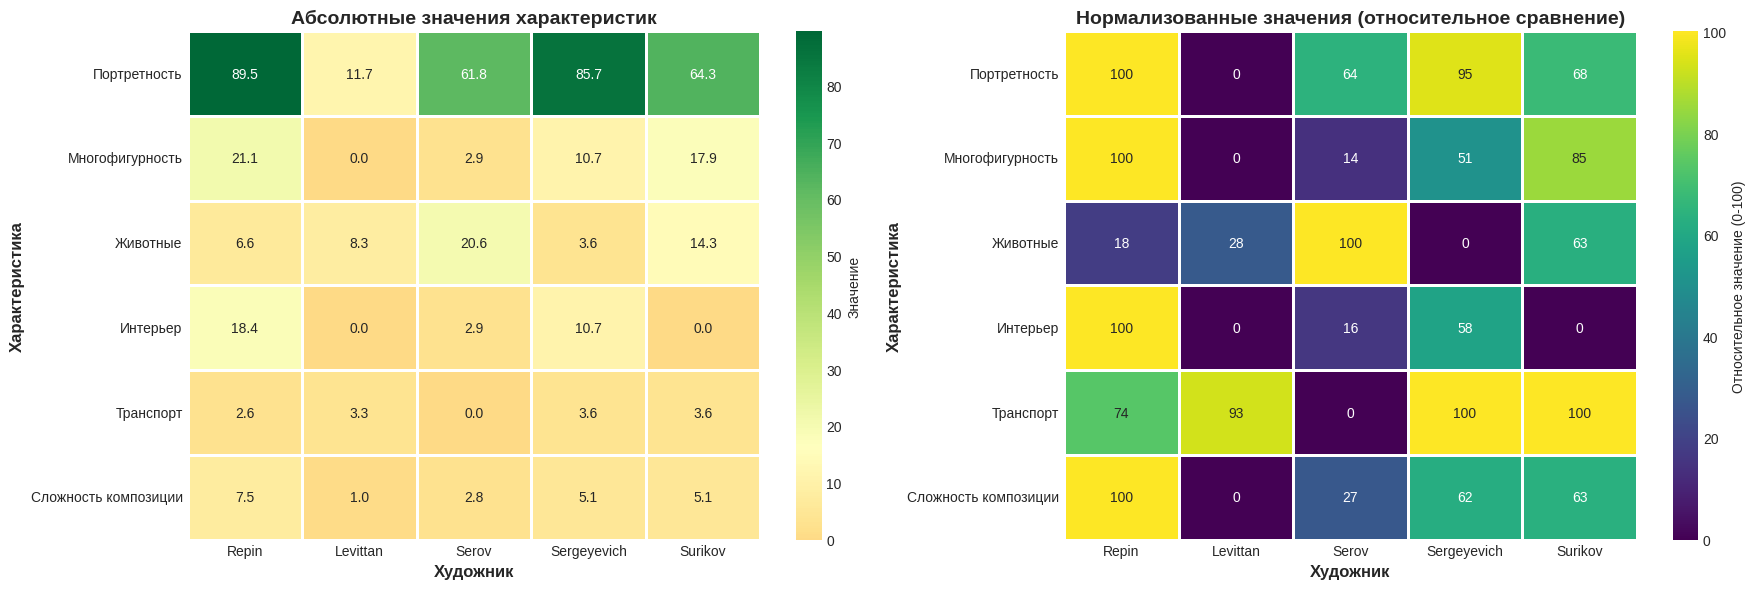

In [18]:
def plot_6_heatmap_correlation(dataset):
    """
    График 6: Сравнение художников по ключевым характеристикам
    Вопрос: Как можно сравнить стили разных художников количественно?
    """
    top_authors = dataset['eng_author'].value_counts().head(5).index.tolist()

    # Ключевые характеристики
    characteristics = {
        'Портретность': lambda df: (df['person'] > 0).mean() * 100,
        'Многофигурность': lambda df: (df['person'] > 2).mean() * 100,
        'Животные': lambda df: ((df['horse'] > 0) | (df['dog'] > 0) | (df['bird'] > 0)).mean() * 100,
        'Интерьер': lambda df: ((df['chair'] > 0) | (df['dining table'] > 0) | (df['book'] > 0)).mean() * 100,
        'Транспорт': lambda df: ((df['boat'] > 0) | (df['car'] > 0) | (df['bicycle'] > 0)).mean() * 100,
        'Сложность композиции': lambda df: df[[col for col in df.columns if col in dataset.select_dtypes(include=[np.number]).columns]].sum(axis=1).mean()
    }

    # Собираем данные
    comparison_data = []
    for author in top_authors:
        author_data = dataset[dataset['eng_author'] == author]
        row = {'author': author}

        for char_name, char_func in characteristics.items():
            try:
                value = char_func(author_data)
                row[char_name] = value
            except:
                row[char_name] = 0

        comparison_data.append(row)

    comp_df = pd.DataFrame(comparison_data)
    comp_df = comp_df.set_index('author')

    # Сокращаем имена авторов
    comp_df.index = [a.split()[-1] if len(a.split()) > 2 else a for a in comp_df.index]

    # График: тепловая карта с нормализацией
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Подграфик 1: Абсолютные значения
    sns.heatmap(comp_df.T, annot=True, fmt='.1f', cmap='RdYlGn',
                center=comp_df.mean().mean(),
                linewidths=1, linecolor='white',
                cbar_kws={'label': 'Значение'},
                ax=axes[0])

    axes[0].set_xlabel('Художник', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Характеристика', fontsize=12, fontweight='bold')
    axes[0].set_title('Абсолютные значения характеристик',
                     fontsize=14, fontweight='bold')

    # Подграфик 2: Нормализованные значения (0-100)
    comp_normalized = comp_df.copy()
    for col in comp_normalized.columns:
        min_val = comp_normalized[col].min()
        max_val = comp_normalized[col].max()
        if max_val > min_val:
            comp_normalized[col] = (comp_normalized[col] - min_val) / (max_val - min_val) * 100

    sns.heatmap(comp_normalized.T, annot=True, fmt='.0f', cmap='viridis',
                vmin=0, vmax=100,
                linewidths=1, linecolor='white',
                cbar_kws={'label': 'Относительное значение (0-100)'},
                ax=axes[1])

    axes[1].set_xlabel('Художник', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Характеристика', fontsize=12, fontweight='bold')
    axes[1].set_title('Нормализованные значения (относительное сравнение)',
                     fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('plot6_author_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_6_heatmap_correlation(dataset)

Теперь, получив кропы людей, можно извлекать из них лица для предсказания эмоций

In [19]:
!pip install -q deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.4 MB/s eta 0:00:00


In [20]:
from PIL import Image
from pathlib import Path
from dataclasses import dataclass
import numpy as np

from deepface import DeepFace


@dataclass
class FaceAnalysis:
    """Структура для хранения полной информации о лице"""
    # Эмоции
    emotion: str
    emotion_confidence: float
    all_emotions: dict

    # Пол
    gender: str  # 'Man' или 'Woman'
    gender_confidence: float

    # Возраст
    age: int

    # Координаты лица
    face_region: dict  # {'x', 'y', 'w', 'h'}


class FaceAnalyzer:
    """Класс для комплексного анализа лиц: эмоции, пол, возраст"""

    def __init__(self, detector_backend='retinaface'):
        """
        Args:
            detector_backend: Бэкенд для детекции лиц
                             ('retinaface', 'mtcnn', 'opencv', 'ssd', 'dlib')
        """

        self.detector_backend = detector_backend
        print(f"✅ FaceAnalyzer инициализирован с бэкендом: {detector_backend}")

    def analyze(
        self,
        image_path: str | Path,
        do_display: bool = False,
        save_faces: bool = True,
        output_dir: str = 'face_analysis'
    ) -> list[FaceAnalysis]:
        """
        Извлекает лица и анализирует их (эмоции, пол, возраст)

        Args:
            image_path: Путь к изображению (кропу человека)
            do_display: Отображать ли результаты
            save_faces: Сохранять ли вырезанные лица
            output_dir: Директория для сохранения

        Returns:
            Список анализов для каждого найденного лица
        """
        image_path = Path(image_path)

        try:
            # Анализируем изображение с помощью DeepFace
            results = DeepFace.analyze(
                img_path=str(image_path),
                actions=['emotion', 'age', 'gender'],  # Все 3 анализа
                enforce_detection=False,
                detector_backend=self.detector_backend,
                silent=True
            )

            # DeepFace возвращает список если найдено несколько лиц
            if not isinstance(results, list):
                results = [results]

            # Загружаем исходное изображение
            image = Image.open(image_path)

            # Создаем директорию для сохранения
            if save_faces:
                output_path = Path(output_dir)
                output_path.mkdir(parents=True, exist_ok=True)

            analyses = []
            image_stem = image_path.stem

            # Обрабатываем каждое найденное лицо
            for i, result in enumerate(results, 1):
                # Извлекаем данные
                emotion = result['dominant_emotion']
                all_emotions = result['emotion']
                emotion_confidence = all_emotions[emotion]

                gender = result['dominant_gender']
                gender_confidence = result['gender'][gender]

                age = int(result['age'])

                face_region = result['region']
                x, y, w, h = face_region['x'], face_region['y'], face_region['w'], face_region['h']

                # Создаем объект анализа
                analysis = FaceAnalysis(
                    emotion=emotion,
                    emotion_confidence=emotion_confidence,
                    all_emotions=all_emotions,
                    gender=gender,
                    gender_confidence=gender_confidence,
                    age=age,
                    face_region=face_region
                )
                analyses.append(analysis)

                # Сохраняем вырезанное лицо
                if save_faces:
                    # Вырезаем лицо с padding
                    padding = 10
                    x1 = max(0, x - padding)
                    y1 = max(0, y - padding)
                    x2 = min(image.width, x + w + padding)
                    y2 = min(image.height, y + h + padding)

                    face_crop = image.crop((x1, y1, x2, y2))

                    # Создаем структуру папок: пол -> эмоция
                    gender_dir = output_path / gender.lower()
                    emotion_dir = gender_dir / emotion
                    emotion_dir.mkdir(parents=True, exist_ok=True)

                    # Формируем информативное имя файла
                    face_filename = f"{image_stem}_face{i}_{gender.lower()}_age{age}_{emotion}.jpg"
                    face_path = emotion_dir / face_filename
                    face_crop.save(face_path)

                # Отображение
                if do_display:
                    face_crop = image.crop((x, y, x+w, y+h))
                    display(face_crop)

            if not analyses:
                print(f"⚠️  Лица не найдены на изображении: {image_path.name}")

            return analyses

        except Exception as e:
            print(f"❌ Ошибка при обработке {image_path.name}: {e}")
            return []

    def analyze_batch(
        self,
        image_paths: list[str | Path],
        save_faces: bool = True,
        output_dir: str = 'face_analysis'
    ) -> dict[str, list[FaceAnalysis]]:
        """
        Пакетная обработка изображений

        Returns:
            Словарь {image_path: [analyses]}
        """
        results = {}

        print(f"\n🚀 Начинаем анализ {len(image_paths)} изображений...\n")
        print("="*70 + "\n")

        for idx, img_path in enumerate(image_paths, 1):
            print(f"[{idx}/{len(image_paths)}] Обработка: {Path(img_path).name}")
            analyses = self.analyze(
                img_path,
                do_display=False,
                save_faces=save_faces,
                output_dir=output_dir
            )
            results[str(img_path)] = analyses

        # Подробная статистика
        self._print_statistics(results)

        return results

    def _print_statistics(self, results: dict):
        """Вывод детальной статистики"""
        total_faces = sum(len(analyses) for analyses in results.values())

        if total_faces == 0:
            print("\n⚠️  Лица не найдены!")
            return

        # Собираем данные
        emotion_counts = {}
        gender_counts = {}
        ages = []

        for analyses in results.values():
            for analysis in analyses:
                # Эмоции
                emotion = analysis.emotion
                emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1

                # Пол
                gender = analysis.gender
                gender_counts[gender] = gender_counts.get(gender, 0) + 1

                # Возраст
                ages.append(analysis.age)

        # Вывод статистики
        print("\n" + "="*70)
        print("📊 СТАТИСТИКА АНАЛИЗА ЛИЦ")
        print("="*70)
        print(f"  Всего обработано изображений: {len(results)}")
        print(f"  Всего найдено лиц: {total_faces}")

        # Статистика по полу
        print("\n  👥 Распределение по полу:")
        for gender in ['Man', 'Woman']:
            count = gender_counts.get(gender, 0)
            percentage = (count / total_faces * 100)
            emoji = "👨" if gender == "Man" else "👩"
            print(f"    {emoji} {gender:10s}: {count:3d} ({percentage:5.1f}%)")

        # Статистика по возрасту
        if ages:
            avg_age = sum(ages) / len(ages)
            min_age = min(ages)
            max_age = max(ages)
            print(f"\n  🎂 Возраст:")
            print(f"    Средний:  {avg_age:.1f} лет")
            print(f"    Минимум:  {min_age} лет")
            print(f"    Максимум: {max_age} лет")

        # Статистика по эмоциям
        print("\n  😊 Распределение эмоций:")
        for emotion, count in sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / total_faces * 100)
            emoji = self._get_emotion_emoji(emotion)
            print(f"    {emoji} {emotion:15s}: {count:3d} ({percentage:5.1f}%)")

        print("="*70 + "\n")

    @staticmethod
    def _get_emotion_emoji(emotion: str) -> str:
        """Получить эмодзи для эмоции"""
        emoji_map = {
            'happy': '😊',
            'sad': '😢',
            'angry': '😠',
            'surprise': '😲',
            'fear': '😨',
            'disgust': '🤢',
            'neutral': '😐'
        }
        return emoji_map.get(emotion, '😶')


# Использование
face_analyzer = FaceAnalyzer(detector_backend='retinaface')

25-10-13 16:20:27 - Directory /root/.deepface has been created
25-10-13 16:20:27 - Directory /root/.deepface/weights has been created
✅ FaceAnalyzer инициализирован с бэкендом: retinaface


In [21]:
from pathlib import Path
person_crops = list(Path('predictions/person').glob('*.jpg'))
all_analyses = face_analyzer.analyze_batch(
    person_crops,
    save_faces=True,
    output_dir='face_analysis_results'
)


🚀 Начинаем анализ 454 изображений...


[1/454] Обработка: 214422607_person_3_conf0.41.jpg
25-10-13 16:20:32 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 111MB/s]


25-10-13 16:20:42 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 77.7MB/s]


25-10-13 16:20:43 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 80.5MB/s]


25-10-13 16:20:52 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:04<00:00, 134MB/s]


[2/454] Обработка: 123345947_person_3_conf0.46.jpg
[3/454] Обработка: 345269775_person_10_conf0.50.jpg
[4/454] Обработка: 266580200_person_8_conf0.61.jpg
[5/454] Обработка: 305197143_person_9_conf0.37.jpg
[6/454] Обработка: 821389770_person_5_conf0.69.jpg
[7/454] Обработка: 847811889_person_1_conf0.96.jpg
[8/454] Обработка: 935372924_person_2_conf0.71.jpg
[9/454] Обработка: 957620239_person_2_conf0.45.jpg
[10/454] Обработка: 611248779_person_1_conf0.89.jpg
[11/454] Обработка: 734790039_person_3_conf0.26.jpg
[12/454] Обработка: 821389770_person_1_conf0.86.jpg
[13/454] Обработка: 261224365_person_1_conf0.91.jpg
[14/454] Обработка: 122164916_person_2_conf0.30.jpg
[15/454] Обработка: 958856201_person_10_conf0.55.jpg
[16/454] Обработка: 469168090_person_5_conf0.75.jpg
[17/454] Обработка: 218679809_person_2_conf0.60.jpg
[18/454] Обработка: 197064208_person_1_conf0.88.jpg
[19/454] Обработка: 266799926_person_2_conf0.75.jpg
[20/454] Обработка: 310140991_person_10_conf0.37.jpg
[21/454] Обработк

In [22]:
from typing import Dict, List
import os


EMO_OUTPUT_PLOTS_DIR = Path("emo_plots")

if not os.path.exists(EMO_OUTPUT_PLOTS_DIR):
    os.makedirs(EMO_OUTPUT_PLOTS_DIR, exist_ok=True)

EMOTION_EMOJIS = {
    'happy': '😊',
    'sad': '😢',
    'angry': '😠',
    'surprise': '😲',
    'fear': '😨',
    'disgust': '🤢',
    'neutral': '😐'
}

EMOTION_COLORS = {
    'happy': '#2ecc71',
    'sad': '#3498db',
    'angry': '#e74c3c',
    'surprise': '#f39c12',
    'fear': '#9b59b6',
    'disgust': '#95a5a6',
    'neutral': '#34495e'
}

def prepare_dataframe(results: Dict[str, List]) -> pd.DataFrame:
    """
    Преобразует результаты анализа в pandas DataFrame

    Args:
        results: Словарь {image_path: [FaceAnalysis]}

    Returns:
        DataFrame с данными для визуализации
    """
    data = []

    for image_path, analyses in results.items():
        for i, analysis in enumerate(analyses):
            row = {
                'image': Path(image_path).stem,
                'face_id': i + 1,
                'emotion': analysis.emotion,
                'emotion_confidence': analysis.emotion_confidence,
                'gender': analysis.gender,
                'gender_confidence': analysis.gender_confidence,
                'age': analysis.age
            }

            # Добавляем все эмоции
            for emotion, confidence in analysis.all_emotions.items():
                row[f'emotion_{emotion}'] = confidence

            data.append(row)

    df = pd.DataFrame(data)
    print(f"📊 Создан DataFrame с {len(df)} лицами")
    return df

emo_df = prepare_dataframe(all_analyses)

emo_df.head(3)

📊 Создан DataFrame с 486 лицами


,image,face_id,emotion,emotion_confidence,gender,gender_confidence,age,emotion_angry,emotion_disgust,emotion_fear,emotion_happy,emotion_sad,emotion_surprise,emotion_neutral
0,214422607_person_3_conf0.41,1,sad,97.275620,Man,94.820007,23,3.467607e-04,2.675001e-10,2.723676,3.530521e-04,97.275620,8.237469e-12,5.168044e-06
1,123345947_person_3_conf0.46,1,sad,99.999939,Man,85.650589,41,5.959510e-12,3.216162e-22,0.000060,2.105527e-08,99.999939,1.484205e-18,2.062079e-08
2,345269775_person_10_conf0.50,1,angry,90.255630,Man,78.956848,35,9.025563e+01,2.689075e-04,4.503346,1.986565e+00,3.229189,2.604606e-04,2.474211e-02


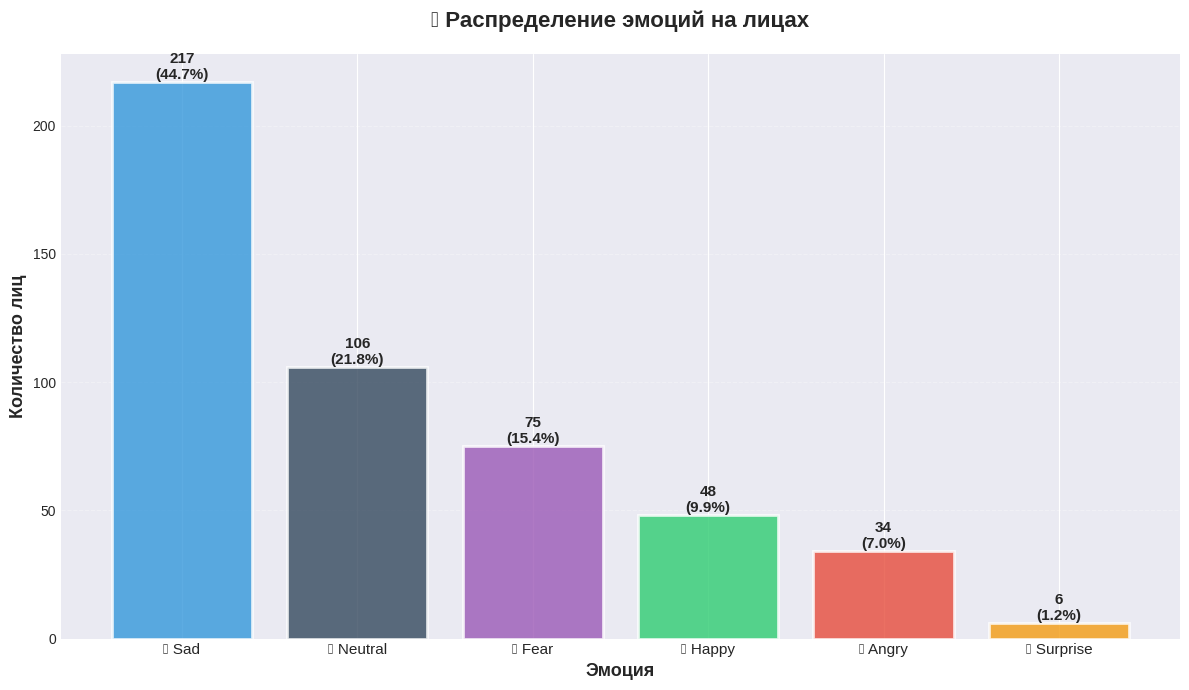

In [23]:
def plot_emotion_distribution(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 1: Распределение эмоций"""
    fig, ax = plt.subplots(figsize=(12, 7))

    # Подсчет эмоций
    emotion_counts = df['emotion'].value_counts()
    emotions = emotion_counts.index.tolist()
    counts = emotion_counts.values
    percentages = (counts / counts.sum() * 100)

    # Цвета и эмодзи
    colors = [EMOTION_COLORS.get(e, '#95a5a6') for e in emotions]
    emojis = [EMOTION_EMOJIS.get(e, '😶') for e in emotions]
    labels = [f"{emoji} {emotion.capitalize()}"
             for emoji, emotion in zip(emojis, emotions)]

    # Создаем барчарт
    bars = ax.bar(range(len(emotions)), counts, color=colors, alpha=0.8,
                 edgecolor='white', linewidth=2)

    # Добавляем значения и проценты
    for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{int(count)}\n({pct:.1f}%)',
               ha='center', va='bottom', fontsize=11, fontweight='bold')

    ax.set_xlabel('Эмоция', fontsize=13, fontweight='bold')
    ax.set_ylabel('Количество лиц', fontsize=13, fontweight='bold')
    ax.set_title('📊 Распределение эмоций на лицах',
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(range(len(emotions)))
    ax.set_xticklabels(labels, fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig(output_dir / '01_emotion_distribution.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_emotion_distribution(emo_df)

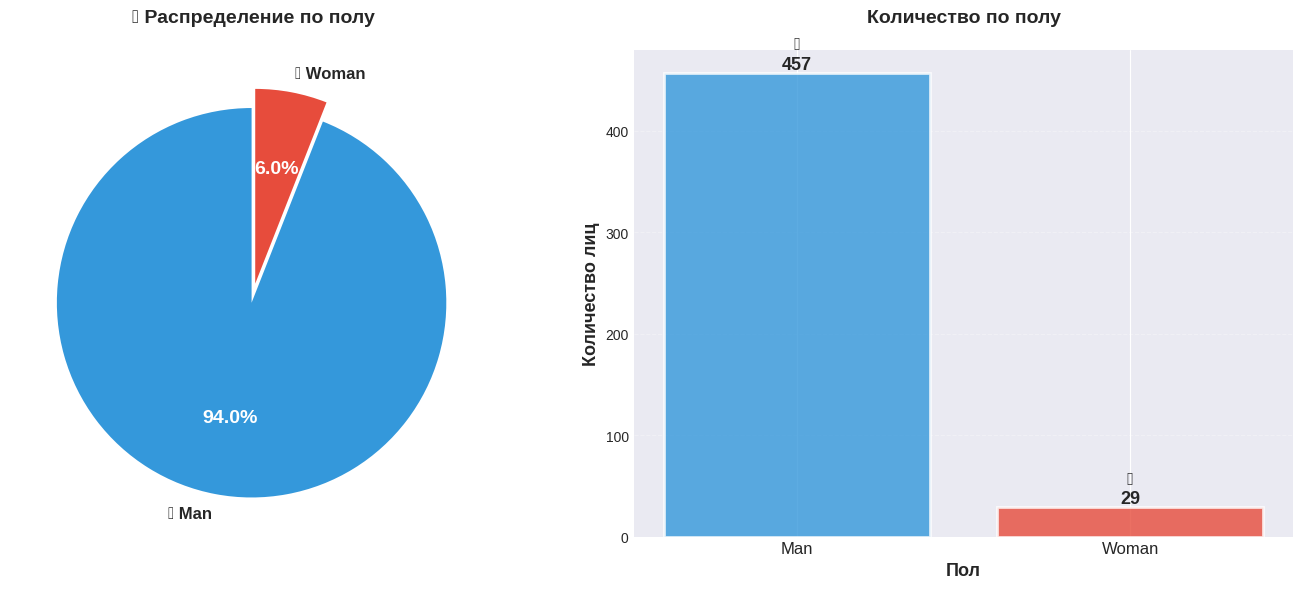

In [24]:
def plot_gender_distribution(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 2: Распределение по полу"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Подсчет по полу
    gender_counts = df['gender'].value_counts()

    # Пай-чарт
    colors_gender = ['#3498db', '#e74c3c']
    explode = (0.05, 0.05)
    wedges, texts, autotexts = ax1.pie(
        gender_counts.values,
        labels=[f"👨 {gender_counts.index[0]}" if gender_counts.index[0] == 'Man'
               else f"👩 {gender_counts.index[0]}" for _ in range(1)] +
               [f"👩 {gender_counts.index[1]}" if gender_counts.index[1] == 'Woman'
               else f"👨 {gender_counts.index[1]}" for _ in range(1)],
        autopct='%1.1f%%',
        colors=colors_gender,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')

    ax1.set_title('👥 Распределение по полу',
                 fontsize=14, fontweight='bold', pad=20)

    # Барчарт с количеством
    genders = gender_counts.index.tolist()
    counts = gender_counts.values
    gender_emojis = ['👨' if g == 'Man' else '👩' for g in genders]

    bars = ax2.bar(range(len(genders)), counts,
                  color=colors_gender, alpha=0.8,
                  edgecolor='white', linewidth=2)

    for i, (bar, count, emoji) in enumerate(zip(bars, counts, gender_emojis)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{emoji}\n{int(count)}',
                ha='center', va='bottom', fontsize=13, fontweight='bold')

    ax2.set_xlabel('Пол', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Количество лиц', fontsize=13, fontweight='bold')
    ax2.set_title('Количество по полу', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(range(len(genders)))
    ax2.set_xticklabels(genders, fontsize=12)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig(output_dir / '02_gender_distribution.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_gender_distribution(emo_df)

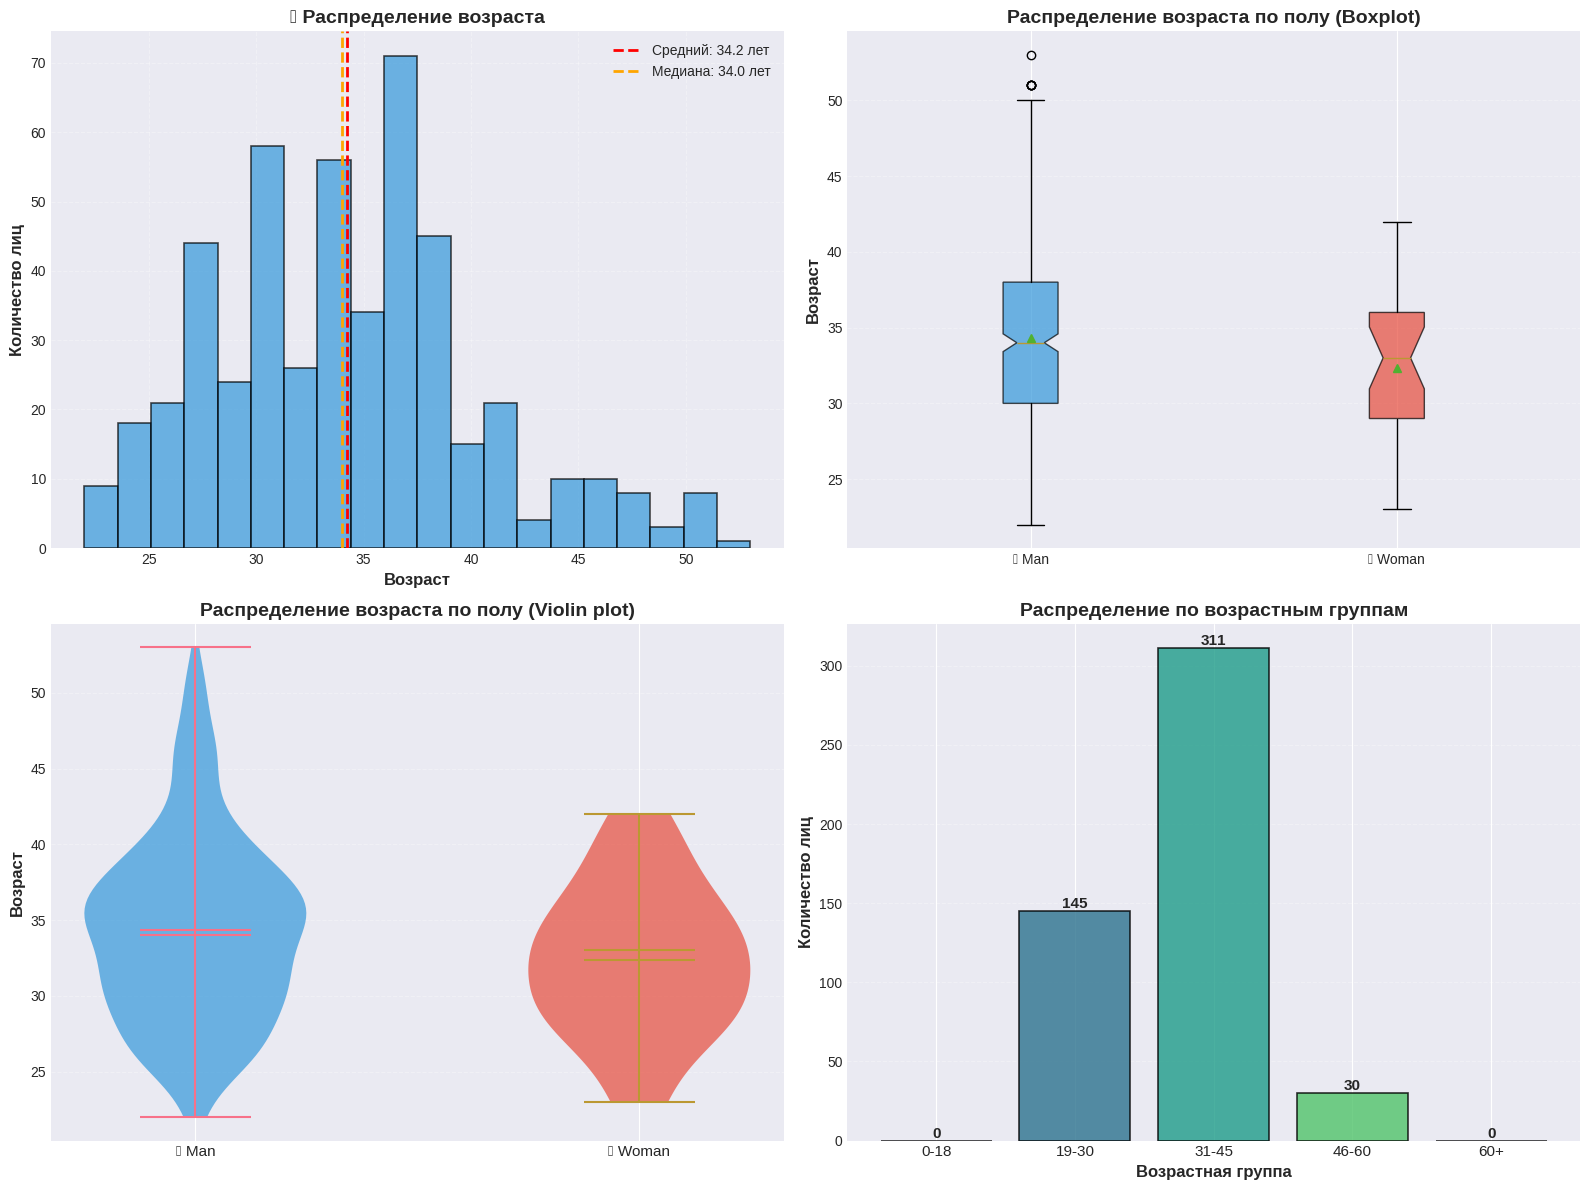

In [25]:
def plot_age_distribution(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 3: Распределение возраста"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # График 1: Общая гистограмма возраста
    ax1 = axes[0, 0]
    ax1.hist(df['age'], bins=20, color='#3498db', alpha=0.7,
            edgecolor='black', linewidth=1.2)
    ax1.axvline(df['age'].mean(), color='red', linestyle='--',
               linewidth=2, label=f"Средний: {df['age'].mean():.1f} лет")
    ax1.axvline(df['age'].median(), color='orange', linestyle='--',
               linewidth=2, label=f"Медиана: {df['age'].median():.1f} лет")

    ax1.set_xlabel('Возраст', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Количество лиц', fontsize=12, fontweight='bold')
    ax1.set_title('🎂 Распределение возраста',
                 fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(alpha=0.3, linestyle='--')

    # График 2: Возраст по полу (boxplot)
    ax2 = axes[0, 1]
    gender_order = ['Man', 'Woman']
    colors_box = ['#3498db', '#e74c3c']

    box_data = [df[df['gender'] == g]['age'].values for g in gender_order
               if g in df['gender'].unique()]
    box_labels = [f"👨 {g}" if g == 'Man' else f"👩 {g}"
                 for g in gender_order if g in df['gender'].unique()]

    bp = ax2.boxplot(box_data, labels=box_labels, patch_artist=True,
                    notch=True, showmeans=True)

    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax2.set_ylabel('Возраст', fontsize=12, fontweight='bold')
    ax2.set_title('Распределение возраста по полу (Boxplot)',
                 fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    # График 3: Возраст по полу (violin plot)
    ax3 = axes[1, 0]
    for i, gender in enumerate(gender_order):
        if gender in df['gender'].unique():
            data = df[df['gender'] == gender]['age']
            parts = ax3.violinplot([data], positions=[i],
                                  showmeans=True, showmedians=True)

            for pc in parts['bodies']:
                pc.set_facecolor(colors_box[i])
                pc.set_alpha(0.7)

    ax3.set_xticks(range(len(box_labels)))
    ax3.set_xticklabels(box_labels, fontsize=11)
    ax3.set_ylabel('Возраст', fontsize=12, fontweight='bold')
    ax3.set_title('Распределение возраста по полу (Violin plot)',
                 fontsize=14, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3, linestyle='--')

    # График 4: Возрастные категории
    ax4 = axes[1, 1]
    age_bins = [0, 18, 30, 45, 60, 100]
    age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    age_group_counts = df['age_group'].value_counts().sort_index()
    colors_age = plt.cm.viridis(np.linspace(0.2, 0.9, len(age_group_counts)))

    bars = ax4.bar(range(len(age_group_counts)), age_group_counts.values,
                  color=colors_age, alpha=0.8, edgecolor='black', linewidth=1.2)

    for bar, count in zip(bars, age_group_counts.values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

    ax4.set_xlabel('Возрастная группа', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Количество лиц', fontsize=12, fontweight='bold')
    ax4.set_title('Распределение по возрастным группам',
                 fontsize=14, fontweight='bold')
    ax4.set_xticks(range(len(age_group_counts)))
    ax4.set_xticklabels(age_group_counts.index, fontsize=11)
    ax4.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig(output_dir / '03_age_distribution.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_age_distribution(emo_df)

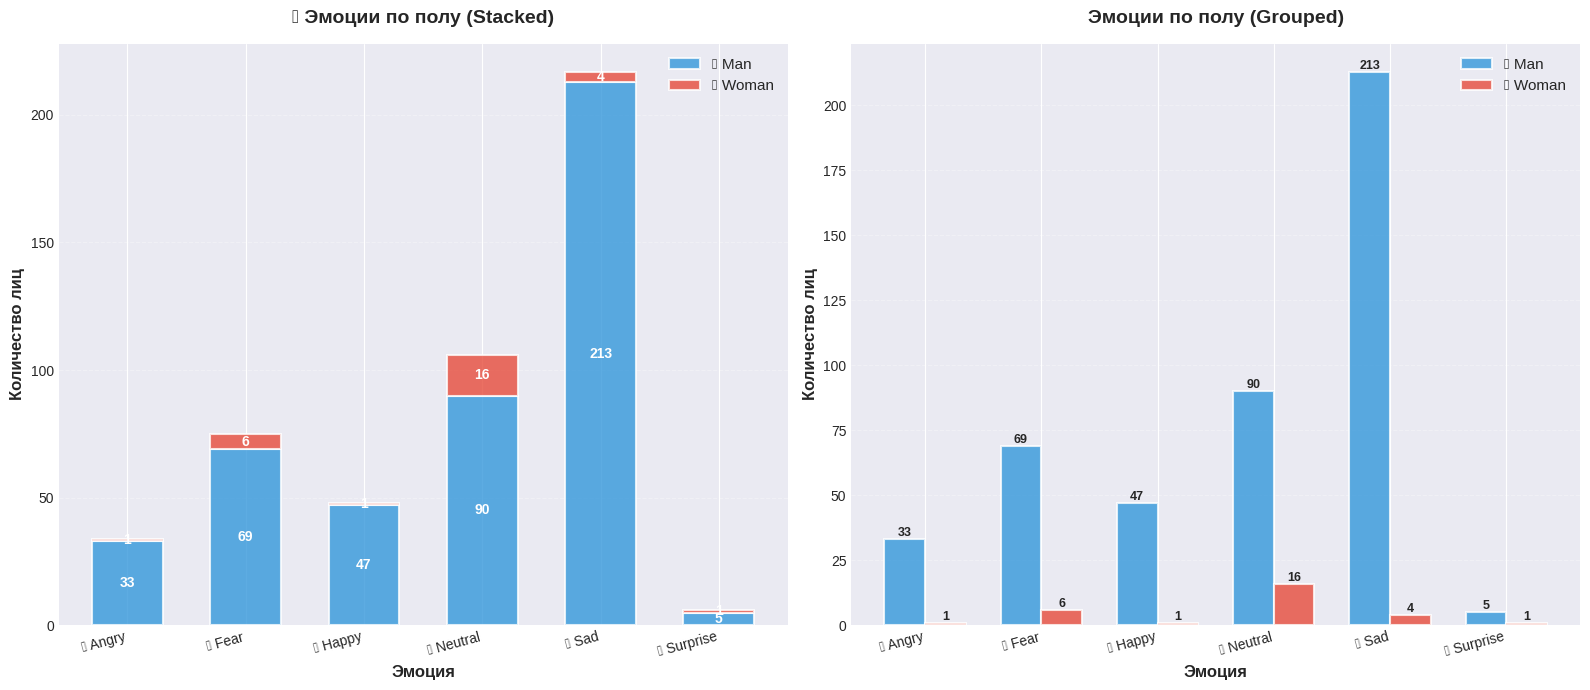

In [26]:
def plot_emotions_by_gender(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 4: Эмоции по полу"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    # Подготовка данных
    emotion_gender = df.groupby(['emotion', 'gender']).size().unstack(fill_value=0)

    # График 1: Stacked bar chart
    emotions = emotion_gender.index.tolist()
    x = np.arange(len(emotions))
    width = 0.6

    colors_gender = {'Man': '#3498db', 'Woman': '#e74c3c'}

    bottom = np.zeros(len(emotions))
    for gender in emotion_gender.columns:
        values = emotion_gender[gender].values
        emoji = '👨' if gender == 'Man' else '👩'
        bars = ax1.bar(x, values, width, label=f'{emoji} {gender}',
                      bottom=bottom, color=colors_gender[gender],
                      alpha=0.8, edgecolor='white', linewidth=1.5)

        # Добавляем значения
        for i, (bar, val) in enumerate(zip(bars, values)):
            if val > 0:
                ax1.text(bar.get_x() + bar.get_width()/2.,
                       bottom[i] + val/2,
                       f'{int(val)}',
                       ha='center', va='center',
                       fontsize=10, fontweight='bold', color='white')

        bottom += values

    labels = [f"{EMOTION_EMOJIS.get(e, '😶')} {e.capitalize()}"
             for e in emotions]
    ax1.set_xlabel('Эмоция', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Количество лиц', fontsize=12, fontweight='bold')
    ax1.set_title('😊 Эмоции по полу (Stacked)',
                 fontsize=14, fontweight='bold', pad=15)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=10, rotation=15, ha='right')
    ax1.legend(fontsize=11)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # График 2: Grouped bar chart
    x = np.arange(len(emotions))
    width = 0.35

    genders = emotion_gender.columns.tolist()
    for i, gender in enumerate(genders):
        offset = width * (i - len(genders)/2 + 0.5)
        values = emotion_gender[gender].values
        emoji = '👨' if gender == 'Man' else '👩'

        bars = ax2.bar(x + offset, values, width,
                      label=f'{emoji} {gender}',
                      color=colors_gender[gender], alpha=0.8,
                      edgecolor='white', linewidth=1.5)

        for bar, val in zip(bars, values):
            if val > 0:
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(val)}',
                       ha='center', va='bottom',
                       fontsize=9, fontweight='bold')

    ax2.set_xlabel('Эмоция', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Количество лиц', fontsize=12, fontweight='bold')
    ax2.set_title('Эмоции по полу (Grouped)',
                 fontsize=14, fontweight='bold', pad=15)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=10, rotation=15, ha='right')
    ax2.legend(fontsize=11)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig(output_dir / '04_emotions_by_gender.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_emotions_by_gender(emo_df)

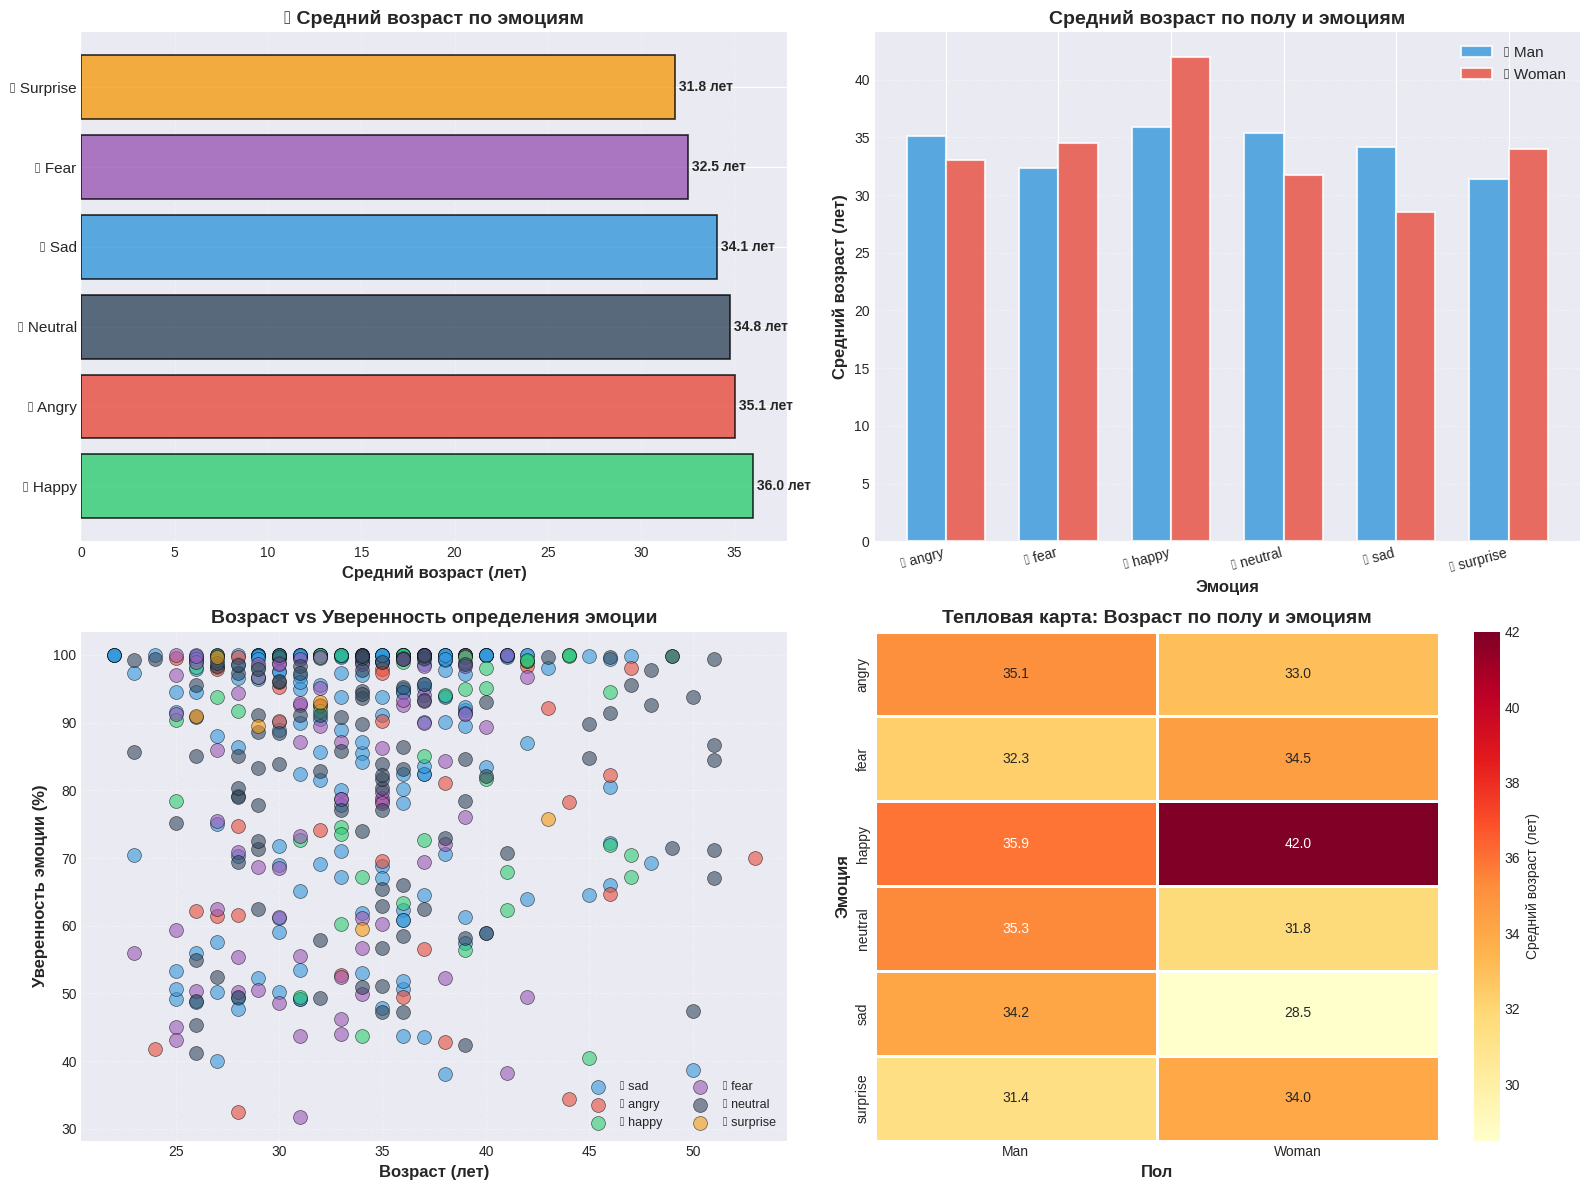

In [27]:
def plot_age_by_gender_and_emotion(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 5: Возраст по полу и эмоциям"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # График 1: Средний возраст по эмоциям
    ax1 = axes[0, 0]
    age_by_emotion = df.groupby('emotion')['age'].mean().sort_values(ascending=False)
    emotions = age_by_emotion.index.tolist()
    ages = age_by_emotion.values

    colors = [EMOTION_COLORS.get(e, '#95a5a6') for e in emotions]
    labels = [f"{EMOTION_EMOJIS.get(e, '😶')} {e.capitalize()}"
             for e in emotions]

    bars = ax1.barh(range(len(emotions)), ages, color=colors, alpha=0.8,
                   edgecolor='black', linewidth=1.2)

    for i, (bar, age) in enumerate(zip(bars, ages)):
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2.,
                f' {age:.1f} лет',
                va='center', fontsize=10, fontweight='bold')

    ax1.set_yticks(range(len(emotions)))
    ax1.set_yticklabels(labels, fontsize=11)
    ax1.set_xlabel('Средний возраст (лет)', fontsize=12, fontweight='bold')
    ax1.set_title('🎂 Средний возраст по эмоциям',
                 fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')

    # График 2: Средний возраст по полу и эмоциям
    ax2 = axes[0, 1]
    age_gender_emotion = df.groupby(['emotion', 'gender'])['age'].mean().unstack()

    x = np.arange(len(age_gender_emotion.index))
    width = 0.35

    colors_gender = {'Man': '#3498db', 'Woman': '#e74c3c'}

    for i, gender in enumerate(age_gender_emotion.columns):
        offset = width * (i - len(age_gender_emotion.columns)/2 + 0.5)
        values = age_gender_emotion[gender].values
        emoji = '👨' if gender == 'Man' else '👩'

        bars = ax2.bar(x + offset, values, width,
                      label=f'{emoji} {gender}',
                      color=colors_gender[gender], alpha=0.8,
                      edgecolor='white', linewidth=1.5)

    labels = [f"{EMOTION_EMOJIS.get(e, '😶')} {e}"
             for e in age_gender_emotion.index]
    ax2.set_xlabel('Эмоция', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Средний возраст (лет)', fontsize=12, fontweight='bold')
    ax2.set_title('Средний возраст по полу и эмоциям',
                 fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=10, rotation=15, ha='right')
    ax2.legend(fontsize=11)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    # График 3: Scatter plot - возраст vs эмоциональная уверенность
    ax3 = axes[1, 0]

    for emotion in df['emotion'].unique():
        emotion_data = df[df['emotion'] == emotion]
        color = EMOTION_COLORS.get(emotion, '#95a5a6')
        emoji = EMOTION_EMOJIS.get(emotion, '😶')

        ax3.scatter(emotion_data['age'],
                   emotion_data['emotion_confidence'],
                   c=color, label=f'{emoji} {emotion}',
                   alpha=0.6, s=100, edgecolor='black', linewidth=0.5)

    ax3.set_xlabel('Возраст (лет)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Уверенность эмоции (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Возраст vs Уверенность определения эмоции',
                 fontsize=14, fontweight='bold')
    ax3.legend(fontsize=9, ncol=2)
    ax3.grid(alpha=0.3, linestyle='--')

    # График 4: Heatmap - возраст по полу и эмоциям
    ax4 = axes[1, 1]

    pivot_data = df.pivot_table(values='age',
                                index='emotion',
                                columns='gender',
                                aggfunc='mean')

    sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd',
               cbar_kws={'label': 'Средний возраст (лет)'},
               linewidths=2, linecolor='white', ax=ax4)

    ax4.set_xlabel('Пол', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Эмоция', fontsize=12, fontweight='bold')
    ax4.set_title('Тепловая карта: Возраст по полу и эмоциям',
                 fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig(output_dir / '05_age_by_gender_emotion.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_age_by_gender_and_emotion(emo_df)

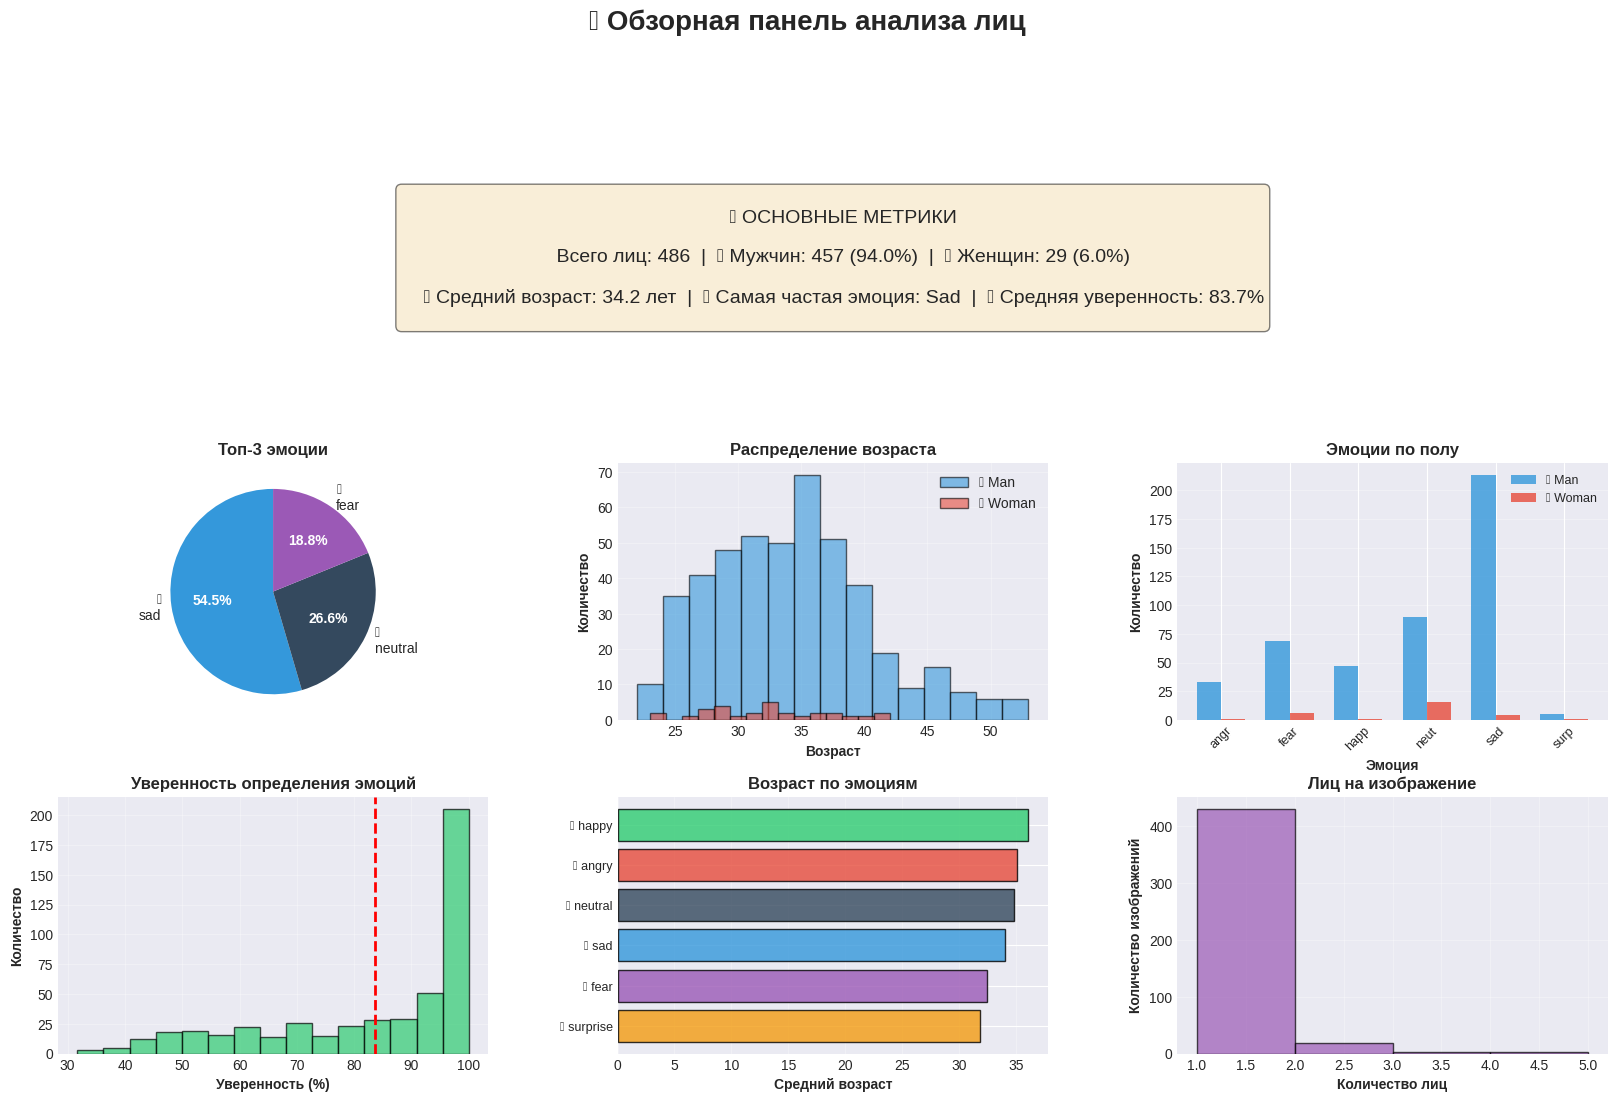

In [28]:
def plot_dashboard(df: pd.DataFrame, output_dir: Path = EMO_OUTPUT_PLOTS_DIR):
    """График 6: Обзорная панель со всей статистикой"""
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # Центральный заголовок
    fig.suptitle('🎭 Обзорная панель анализа лиц',
                fontsize=20, fontweight='bold', y=0.98)

    # 1. Основные метрики (текст)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.axis('off')

    total_faces = len(df)
    avg_age = df['age'].mean()
    men_count = (df['gender'] == 'Man').sum()
    women_count = (df['gender'] == 'Woman').sum()
    most_common_emotion = df['emotion'].value_counts().index[0]
    avg_emotion_conf = df['emotion_confidence'].mean()

    stats_text = f"""
    📊 ОСНОВНЫЕ МЕТРИКИ

    Всего лиц: {total_faces}  |  👨 Мужчин: {men_count} ({men_count/total_faces*100:.1f}%)  |  👩 Женщин: {women_count} ({women_count/total_faces*100:.1f}%)

    🎂 Средний возраст: {avg_age:.1f} лет  |  😊 Самая частая эмоция: {most_common_emotion.capitalize()}  |  📈 Средняя уверенность: {avg_emotion_conf:.1f}%
    """

    ax1.text(0.5, 0.5, stats_text, ha='center', va='center',
            fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 2. Топ-3 эмоций
    ax2 = fig.add_subplot(gs[1, 0])
    top_emotions = df['emotion'].value_counts().head(3)
    colors = [EMOTION_COLORS.get(e, '#95a5a6') for e in top_emotions.index]
    labels = [f"{EMOTION_EMOJIS.get(e, '😶')}\n{e}"
             for e in top_emotions.index]

    wedges, texts, autotexts = ax2.pie(top_emotions.values, labels=labels,
                                       autopct='%1.1f%%', colors=colors,
                                       startangle=90)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    ax2.set_title('Топ-3 эмоции', fontsize=12, fontweight='bold')

    # 3. Возраст по полу
    ax3 = fig.add_subplot(gs[1, 1])
    for gender in df['gender'].unique():
        data = df[df['gender'] == gender]['age']
        emoji = '👨' if gender == 'Man' else '👩'
        color = '#3498db' if gender == 'Man' else '#e74c3c'
        ax3.hist(data, alpha=0.6, label=f'{emoji} {gender}',
                color=color, bins=15, edgecolor='black')

    ax3.set_xlabel('Возраст', fontsize=10, fontweight='bold')
    ax3.set_ylabel('Количество', fontsize=10, fontweight='bold')
    ax3.set_title('Распределение возраста', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(alpha=0.3)

    # 4. Эмоции по полу
    ax4 = fig.add_subplot(gs[1, 2])
    emotion_gender = df.groupby(['emotion', 'gender']).size().unstack(fill_value=0)

    x = np.arange(len(emotion_gender.index))
    width = 0.35

    for i, gender in enumerate(emotion_gender.columns):
        offset = width * (i - 0.5)
        emoji = '👨' if gender == 'Man' else '👩'
        color = '#3498db' if gender == 'Man' else '#e74c3c'
        ax4.bar(x + offset, emotion_gender[gender].values, width,
               label=f'{emoji} {gender}', color=color, alpha=0.8)

    ax4.set_xlabel('Эмоция', fontsize=10, fontweight='bold')
    ax4.set_ylabel('Количество', fontsize=10, fontweight='bold')
    ax4.set_title('Эмоции по полу', fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels([e[:4] for e in emotion_gender.index],
                       fontsize=9, rotation=45)
    ax4.legend(fontsize=9)
    ax4.grid(axis='y', alpha=0.3)

    # 5. Уверенность модели
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.hist(df['emotion_confidence'], bins=15, color='#2ecc71',
            alpha=0.7, edgecolor='black')
    ax5.axvline(df['emotion_confidence'].mean(), color='red',
               linestyle='--', linewidth=2)
    ax5.set_xlabel('Уверенность (%)', fontsize=10, fontweight='bold')
    ax5.set_ylabel('Количество', fontsize=10, fontweight='bold')
    ax5.set_title('Уверенность определения эмоций',
                 fontsize=12, fontweight='bold')
    ax5.grid(alpha=0.3)

    # 6. Средний возраст по эмоциям
    ax6 = fig.add_subplot(gs[2, 1])
    age_by_emotion = df.groupby('emotion')['age'].mean().sort_values()
    colors = [EMOTION_COLORS.get(e, '#95a5a6') for e in age_by_emotion.index]

    ax6.barh(range(len(age_by_emotion)), age_by_emotion.values,
            color=colors, alpha=0.8, edgecolor='black')
    ax6.set_yticks(range(len(age_by_emotion)))
    ax6.set_yticklabels([f"{EMOTION_EMOJIS.get(e, '😶')} {e}"
                        for e in age_by_emotion.index], fontsize=9)
    ax6.set_xlabel('Средний возраст', fontsize=10, fontweight='bold')
    ax6.set_title('Возраст по эмоциям', fontsize=12, fontweight='bold')
    ax6.grid(axis='x', alpha=0.3)

    # 7. Количество лиц на изображение
    ax7 = fig.add_subplot(gs[2, 2])
    faces_per_image = df.groupby('image').size()
    ax7.hist(faces_per_image, bins=range(1, faces_per_image.max() + 2),
            color='#9b59b6', alpha=0.7, edgecolor='black')
    ax7.set_xlabel('Количество лиц', fontsize=10, fontweight='bold')
    ax7.set_ylabel('Количество изображений', fontsize=10, fontweight='bold')
    ax7.set_title('Лиц на изображение', fontsize=12, fontweight='bold')
    ax7.grid(alpha=0.3)

    plt.savefig(output_dir / '08_dashboard.png',
               dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_dashboard(emo_df)